## Final Project Submission

Please fill out:
* Student name: __Scott Okamura__
* Student pace: __self paced__ / part time / full time
* Scheduled project review date/time: 
* Instructor name: __Jeff Herman__
* Blog post URL:


The purpose of this notebook is to find a linear regression model that could accurately predict the sale price of a house in King County, based off of sales data from 2014. Once I had my dataset loaded, I knew that my dependent variable would be `price`, for obvious reasons. The independent variables, however, would be a little more complicated  as there were almost 20 unique columns. I knew that, most likely, my final model would not include every single variable from the original dataset. 

My overall approach to this project followed the __OSEMN__ data science model. Even though it was the primary focus of the module 1 project, _scrubbing_ the data was a lot more complicated this time around. This dataset needed to be manipulated and transformed in many ways in order to meet certain assumptions to fit the linear regression model.

## Target audience: People looking to sell their house in King County

In [1]:
ls

CONTRIBUTING.md          df_before_trans.csv      mod2_project_rubric.pdf
LICENSE.md               df_not_dropped.csv       project-Copy1.2.ipynb
README.md                df_w_sqftlot.csv         project.2.ipynb
column_names.md          halfway-there.gif        project.ipynb
df_before_trans          kc_house_data.csv


# Data Understanding
## Importing necessarily libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.stats.api as sms

/Users/scott/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.shape

(21597, 21)

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The max for bedrooms seems out of place. It is either an extreme outlier, or a typo. This will need to be investigated further in a later section. Due to the size of the property and the number of bathrooms, I am leaning on the side of typo. Will have to compare with other houses in the same price range with similar sq ft and # of bathrooms.

In [7]:
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [9]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Data Preparation


In [10]:
df.drop(columns='id',axis=1,inplace=True) # id column is for transaction purposes, not for housing data

In [11]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Detecting/dealing with missing values

The first column with null values is "waterfront", whether or not the property has a waterfront view. 

In [12]:
df['waterfront']

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21592    0.0
21593    0.0
21594    0.0
21595    NaN
21596    0.0
Name: waterfront, Length: 21597, dtype: float64

In [13]:
df['waterfront'].isna().sum() / len(df) # 11% of waterfront values are null.

0.11001527989998611

I will drop all of the NaN's from the `waterfront` column as they only make up about 11% of the overall data.

In [14]:
df.dropna(subset=['waterfront'], inplace=True)

In [15]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               57
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3412
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Next column with null values is `'view'`. This corresponds to the number of times the property was viewed.

In [16]:
df['view'].value_counts(normalize=True)

0.0    0.903360
2.0    0.043623
3.0    0.022699
1.0    0.015185
4.0    0.015133
Name: view, dtype: float64

90% of the values are 0, meaning that this most likely will not affect our final model. Therefore, I will drop this column.

In [17]:
df.drop('view',axis=1,inplace=True)

In [18]:
df.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3412
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Last variable with null values is `yr_renovated`. 

In [19]:
df['yr_renovated'].value_counts(normalize=True).head()

0.0       0.958758
2014.0    0.004048
2013.0    0.001834
2005.0    0.001708
2000.0    0.001581
Name: yr_renovated, dtype: float64

Since 96% of `yr_renovated` is 0, which means either the data is unknown or the house has never been renovated, I will drop this column.

In [20]:
df.drop('yr_renovated',axis=1,inplace=True)

Checking for any other values that may cause issues with our model later on. `sqft_basement` looks to be the only variable with `'?'`.

In [21]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [22]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head())

date 
 6/23/2014    0.006451
6/25/2014    0.006243
6/26/2014    0.006035
7/8/2014     0.005931
4/21/2015    0.005827
Name: date, dtype: float64
price 
 450000.0    0.007960
350000.0    0.007648
550000.0    0.007492
500000.0    0.007388
425000.0    0.007024
Name: price, dtype: float64
bedrooms 
 3    0.453722
4    0.319911
2    0.127517
5    0.074970
6    0.011810
Name: bedrooms, dtype: float64
bathrooms 
 2.50    0.251756
1.00    0.177462
1.75    0.141772
2.25    0.093023
2.00    0.089590
Name: bathrooms, dtype: float64
sqft_living 
 1300    0.006503
1440    0.006295
1400    0.006243
1820    0.006139
1660    0.005879
Name: sqft_living, dtype: float64
sqft_lot 
 5000    0.017117
6000    0.013163
4000    0.011550
7200    0.009677
4800    0.005827
Name: sqft_lot, dtype: float64
floors 
 1.0    0.493887
2.0    0.382394
1.5    0.087456
3.0    0.028406
2.5    0.007544
Name: floors, dtype: float64
waterfront 
 0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64
condition 
 3    0

According to `column_names.md`, `sqft_living` is simply the difference between `sqft_above` and `sqft_basement`. Using that information, we can determine the missing `'?'` values.

In [23]:
df.loc[df['sqft_basement'] == '?']

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,1995,98003,47.3097,-122.327,2238,6819
18,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,4,7,1200,?,1921,98002,47.3089,-122.210,1060,5095
42,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,3,9,3595,?,2014,98053,47.6848,-122.016,3625,5639
79,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,3,10,3450,?,2002,98010,47.3420,-122.025,3350,39750
112,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,4,7,1160,?,1980,98038,47.3624,-122.031,1540,11656
115,11/21/2014,740500.0,3,3.50,4380,6350,2.0,0.0,3,8,2780,?,1900,98117,47.6981,-122.368,1830,6350
217,7/3/2014,445838.0,3,2.50,2250,5692,2.0,0.0,3,8,2250,?,2000,98146,47.5133,-122.379,1320,5390
384,7/28/2014,1350000.0,5,3.50,4800,14984,2.0,0.0,3,11,3480,?,1998,98006,47.5543,-122.148,4050,19009
508,5/8/2014,615000.0,2,1.00,1540,6872,1.0,0.0,4,7,820,?,1946,98119,47.6454,-122.373,1420,5538
633,9/12/2014,650000.0,3,2.50,2690,11575,1.0,0.0,3,8,2130,?,1957,98028,47.7605,-122.267,2390,11782


In [24]:
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = (df['sqft_living'] - df['sqft_above'])

Check to make sure all `'?'` values were changed to reflect the accurate `sqft_basement` value.

In [25]:
df[df['sqft_basement'] == '?']

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15


No duplicates found in the dataset. For now, we can move on to converting data types.

In [26]:
df[df.duplicated()]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15


### Data type conversions

In [27]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [28]:
df['sqft_basement'] = df['sqft_basement'].astype(float)
df['date'] = pd.to_datetime(df['date'])

In [29]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [30]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930


### Checking for any additional values that may be used as placeholders/NaN/?/None

In [31]:
for x in df.columns:
    print(df.groupby(by=x)[x].count().sort_values(ascending=False).head(), '\n\n')

date
2014-06-23    124
2014-06-25    120
2014-06-26    116
2014-07-08    114
2015-04-21    112
Name: date, dtype: int64 


price
450000.0    153
350000.0    147
550000.0    144
500000.0    142
425000.0    135
Name: price, dtype: int64 


bedrooms
3    8721
4    6149
2    2451
5    1441
6     227
Name: bedrooms, dtype: int64 


bathrooms
2.50    4839
1.00    3411
1.75    2725
2.25    1788
2.00    1722
Name: bathrooms, dtype: int64 


sqft_living
1300    125
1440    121
1400    120
1820    118
1660    113
Name: sqft_living, dtype: int64 


sqft_lot
5000    329
6000    253
4000    222
7200    186
4800    112
Name: sqft_lot, dtype: int64 


floors
1.0    9493
2.0    7350
1.5    1681
3.0     546
2.5     145
Name: floors, dtype: int64 


waterfront
0.0    19075
1.0      146
Name: waterfront, dtype: int64 


condition
3    12474
4     5058
5     1512
2      152
1       25
Name: condition, dtype: int64 


grade
7     7974
8     5409
9     2320
6     1810
10    1018
Name: grade, dtype: int64 



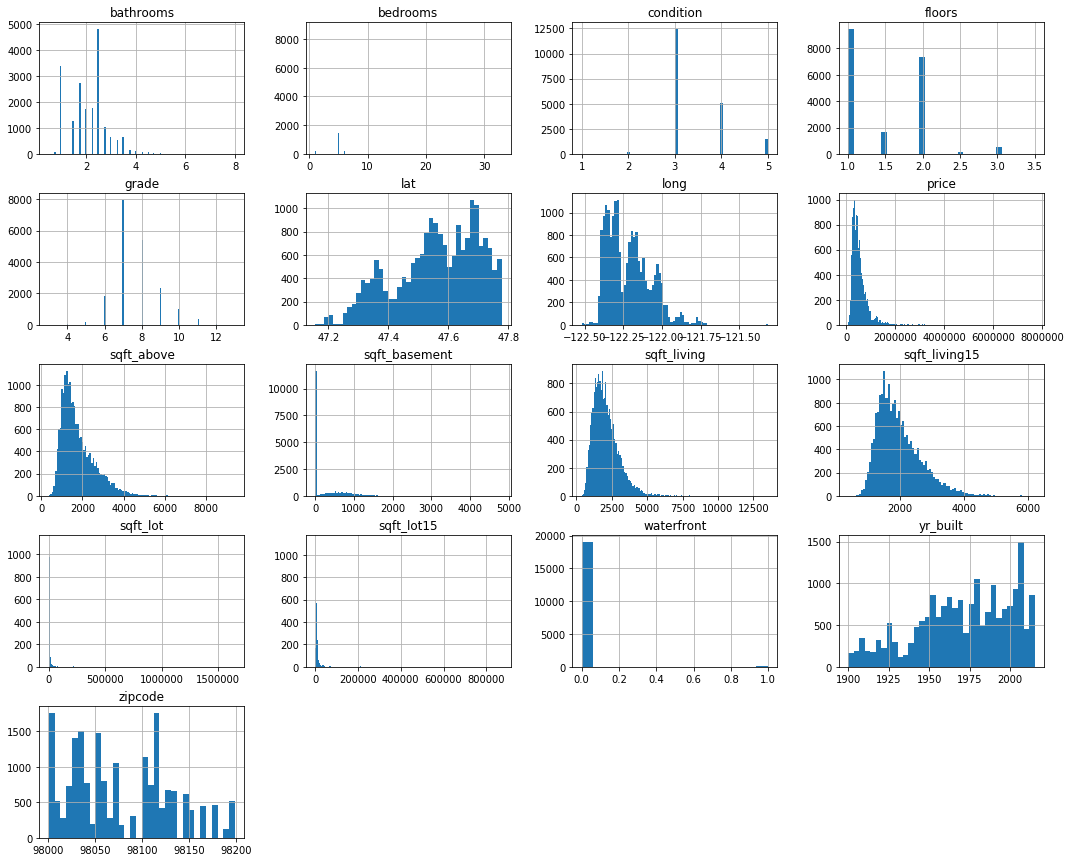

In [32]:
df.hist(figsize=(18,15),bins='auto');

The histograms above show the distribution of values in the dataset. A number of them are zoomed far out from the actual data points, meaning that there are outliers skewing the data.

The histograms also tell us if the variables are either continuous or categorical. The number of unique values for the categorical variables will be considerably less than the continuous variables. 

In [33]:
cont_cols = ['price', 'sqft_above','sqft_basement','sqft_living','sqft_living15','sqft_lot','sqft_lot15','lat','long']
cat_cols = ['bathrooms','bedrooms','condition','floors','grade','waterfront','yr_built','zipcode']

## Checking for outliers

In [34]:
for x in df.columns:
    print(f'Values for {x.upper()}')
    print(df[x].value_counts().sort_index(ascending = False).head(5))
    print("--------")
    print(df[x].value_counts().sort_index(ascending = False).tail(5))
    print(f'Mean of {x.upper()}:', df[x].mean())
    print("\n\n")


Values for DATE
2015-05-27     1
2015-05-24     1
2015-05-15     1
2015-05-14     9
2015-05-13    28
Name: date, dtype: int64
--------
2014-05-06    77
2014-05-05    75
2014-05-04     4
2014-05-03     4
2014-05-02    60
Name: date, dtype: int64
Mean of DATE: 2014-10-29 03:11:06.958014464



Values for PRICE
7700000.0    1
7060000.0    1
6890000.0    1
5570000.0    1
5350000.0    1
Name: price, dtype: int64
--------
84000.0    1
83000.0    1
82500.0    1
82000.0    1
78000.0    1
Name: price, dtype: int64
Mean of PRICE: 541639.8338275844



Values for BEDROOMS
33     1
11     1
10     3
9      6
8     11
Name: bedrooms, dtype: int64
--------
5    1441
4    6149
3    8721
2    2451
1     175
Name: bedrooms, dtype: int64
Mean of BEDROOMS: 3.374642318297695



Values for BATHROOMS
8.00    2
7.75    1
7.50    1
6.75    2
6.50    1
Name: bathrooms, dtype: int64
--------
1.50    1283
1.25       8
1.00    3411
0.75      65
0.50       4
Name: bathrooms, dtype: int64
Mean of BATHROOMS: 2.1170724

### Outliers in Categorical Data

Using the above data, we can see some outliers without doing any calculations. For one, the 33 bedrooms in a house must be a typo or an extreme outlier. To determine this, I can compare the other variables for that house with 33 bedrooms and see if it is similar to houses with 3 bedrooms.

In [35]:
df.loc[(df['bedrooms'] == 33)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,1040,580.0,1947,98103,47.6878,-122.331,1330,4700


In [36]:
df.loc[(df['bedrooms'] ==3) & (df['bathrooms'] ==1.75 ) & (df['sqft_living'] < 1700) & (df['floors'] == 1)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
13,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0.0,4,7,1370,0.0,1977,98074,47.6127,-122.045,1370,10208
28,2014-06-24,438000.0,3,1.75,1520,6380,1.0,0.0,3,7,790,730.0,1948,98115,47.6950,-122.304,1520,6235
48,2015-04-28,450000.0,3,1.75,1250,5963,1.0,0.0,4,7,1250,0.0,1953,98115,47.6796,-122.301,970,5100
52,2014-12-31,600000.0,3,1.75,1410,4080,1.0,0.0,4,7,1000,410.0,1950,98117,47.6808,-122.384,1410,4080
61,2014-08-28,289000.0,3,1.75,1260,8400,1.0,0.0,3,7,1260,0.0,1954,98148,47.4366,-122.335,1290,8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19437,2014-08-19,300000.0,3,1.75,1310,9761,1.0,0.0,3,7,1310,0.0,1967,98034,47.7210,-122.228,1490,9600
19466,2014-08-05,185000.0,3,1.75,1080,9262,1.0,0.0,3,7,1080,0.0,1968,98178,47.4883,-122.248,1090,9262
19534,2014-09-26,460000.0,3,1.75,1300,4000,1.0,0.0,3,7,900,400.0,1953,98199,47.6368,-122.388,1750,4000
19554,2014-08-20,619790.0,3,1.75,1040,5097,1.0,0.0,4,7,800,240.0,1944,98199,47.6385,-122.401,1630,5097


Other houses the same amount of bathrooms, floors, and similar living area have 3 bathrooms, leading me to assume that the 33 value was a typo.

In [37]:
df.at[15856, 'bedrooms'] = 3

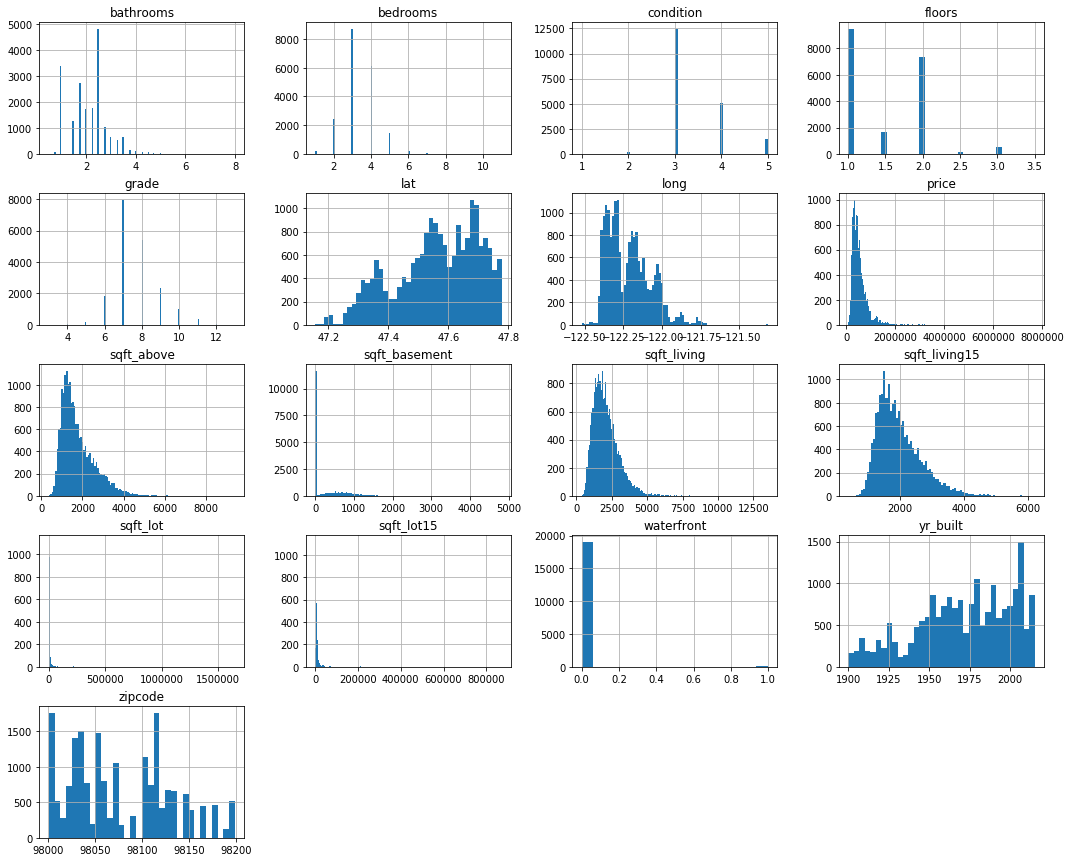

In [38]:
df.hist(figsize=(18,15),bins='auto');

In [39]:
df['bedrooms'].describe()

count    19221.000000
mean         3.373082
std          0.903618
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

In [40]:
cat_ignore = ['zipcode','waterfront','yr_built']

In [41]:
for i in cat_cols:
    if not i in cat_ignore:
        print(df[i].value_counts().sort_index(ascending=False))
        print(f'Mean value for {i}', df[i].mean(), '\n\n')

8.00       2
7.75       1
7.50       1
6.75       2
6.50       1
6.25       2
6.00       6
5.75       3
5.50      10
5.25      11
5.00      17
4.75      22
4.50      91
4.25      73
4.00     121
3.75     136
3.50     656
3.25     521
3.00     662
2.75    1038
2.50    4839
2.25    1788
2.00    1722
1.75    2725
1.50    1283
1.25       8
1.00    3411
0.75      65
0.50       4
Name: bathrooms, dtype: int64
Mean value for bathrooms 2.1170724728161905 


11       1
10       3
9        6
8       11
7       35
6      227
5     1441
4     6149
3     8722
2     2451
1      175
Name: bedrooms, dtype: int64
Mean value for bedrooms 3.3730815254149107 


5     1512
4     5058
3    12474
2      152
1       25
Name: condition, dtype: int64
Mean value for condition 3.40996826387805 


3.5       6
3.0     546
2.5     145
2.0    7350
1.5    1681
1.0    9493
Name: floors, dtype: int64
Mean value for floors 1.495031475989803 


13      13
12      82
11     357
10    1018
9     2320
8     5409
7     7974
6

The final model that I am creating will predict the price of a house, given certain parameters. That means the model must be made according to the "average" house. The data above shows that there are outliers in the categorical data. Any home with over 5 bathrooms, 6 bedrooms, 3 floors, and a grade of 10 can be assumed to be outliers in the dataset. 

In [42]:
to_drop = df.loc[(df['bathrooms'] > 5) | (df['bathrooms'] < 1) | 
                 (df['bedrooms'] > 6) | (df['condition'] < 3) | 
                 (df['floors'] > 3) | (df['grade'] > 10) | (df['grade'] < 6)].index

In [43]:
df.drop(to_drop, inplace=True)

### Outliers in Continuous Variables

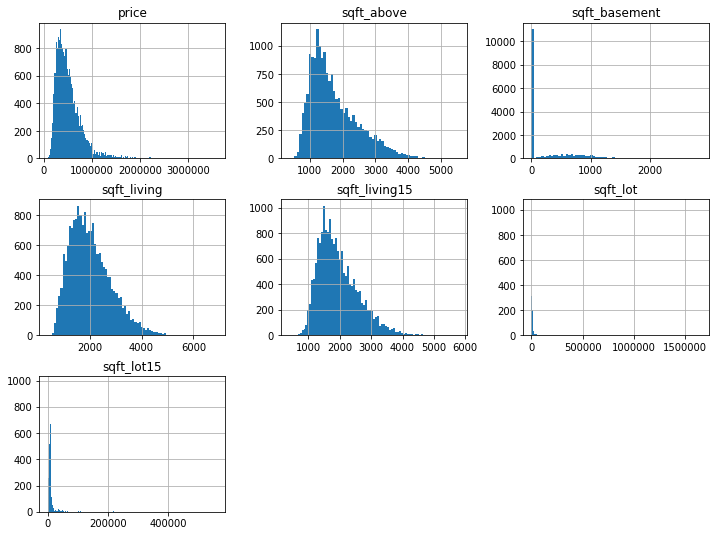

In [44]:
df.hist(column=cont_cols[:-2], layout=(3,3),figsize=(12,9), bins='auto');

The histograms of the continuous variables show that all of these columns need some cleaning.

`price`, `sqft_above`, `sqft_living`, and `sqft_living15` have a somewhat normal distribution but show skewing to the right due to the outliers. 

`sqft_basement`, `sqft_lot`, and `sqft_lot15` have outliers that make it difficult to visualize the size of the histogram values. After dropping the outliers from the dataset, I will revisit these histograms and see if the plots look a little more normalized. 

The `price` plot shows that a majority of the values fall between the 0 and 1 million mark. After that, the trailing data points show a sharp decrease in frequency. Looking at the data, we can see that only 5% of the `price` data is $> 1000000$. This value will be dropped and the histograms will be visualized once more to see the effects of dropping those values.

In [45]:
len(df.loc[(df['price'] > 1000000)]) / len(df)

0.05082056892778993

In [46]:
df.drop(df.loc[(df['price'] > 1000000)].index, inplace=True)

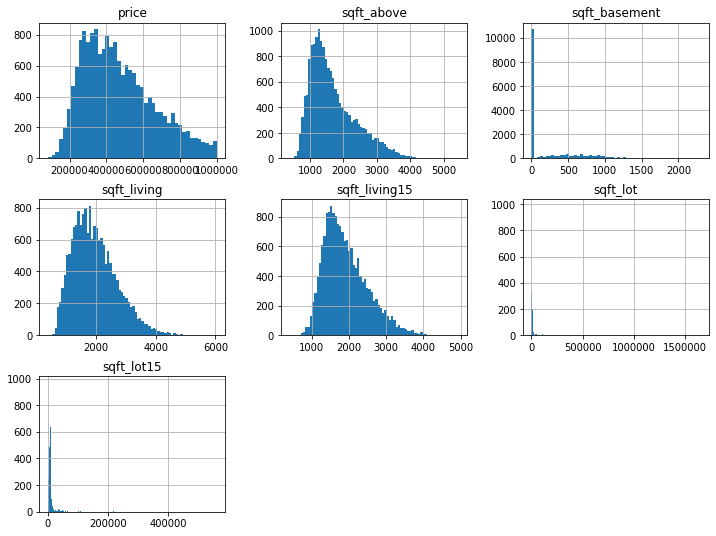

In [47]:
df.hist(column=cont_cols[:-2], layout=(3,3),figsize=(12,9), bins='auto');

By dropping all the values greater than 1000000 in `price`, we see that it did not affect the other plots significantly. We still need to drop other outliers in order to see a better distribution in the plots.

`sqft_above` shows some trailing outliers on the right side of the curve. There is only 6% of the total dataset that contains properties with more than 3000 sqft above ground. These will be dropped and the histograms will be visualized once more.

In [48]:
len(df.loc[(df['sqft_above'] > 3000)]) / len(df)

0.06230188461760129

In [49]:
df.drop(df.loc[(df['sqft_above'] > 3000)].index, inplace=True)

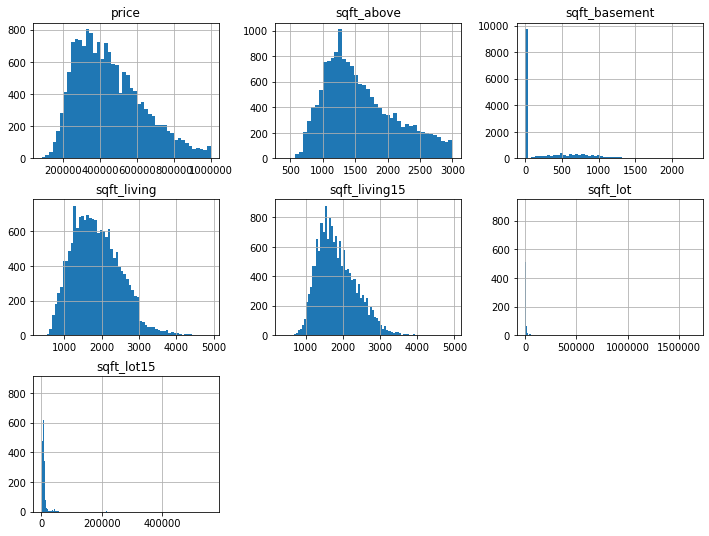

In [50]:
df.hist(column=cont_cols[:-2], layout=(3,3),figsize=(12,9), bins='auto');

Once again, we are now able to see a nicer normal curve for `sqft_above`, but the other plots that we haven't corrected yet still show skewness and extreme outliers. This process of removing outliers and checking the histogram will be repeated below until all plots show a somewhat normal curve.

`sqft_basement` looks like it has mostly 0 values. It may be converted into a binary, `basement` variable with 0 if there is no basement and 1 if there is. This will be investigated further later.

In [51]:
len(df.loc[(df['sqft_living'] > 3000)]) / len(df)

0.03601720958819914

In [52]:
df.drop(df.loc[(df['sqft_living'] > 3000)].index, inplace=True)

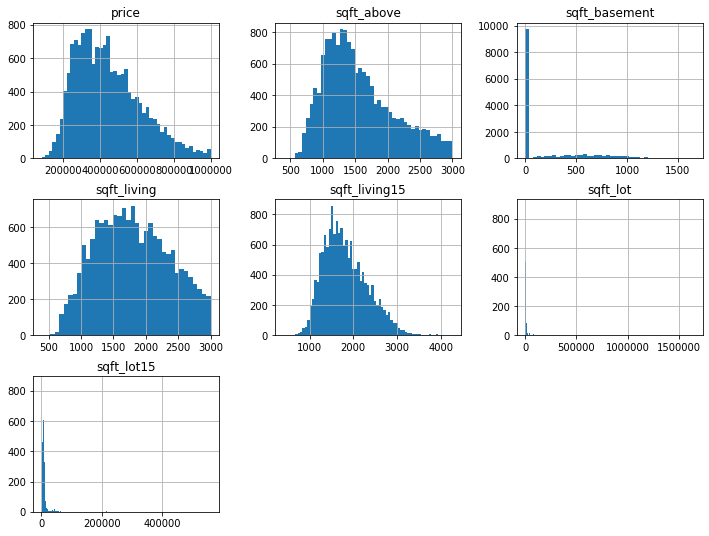

In [53]:
df.hist(column=cont_cols[:-2], layout=(3,3),figsize=(12,9), bins='auto');

In [54]:
len(df.loc[(df['sqft_living15'] > 3000)]) / len(df)

0.01536597806681969

In [55]:
df.drop(df.loc[(df['sqft_living15'] > 3000)].index, inplace=True)

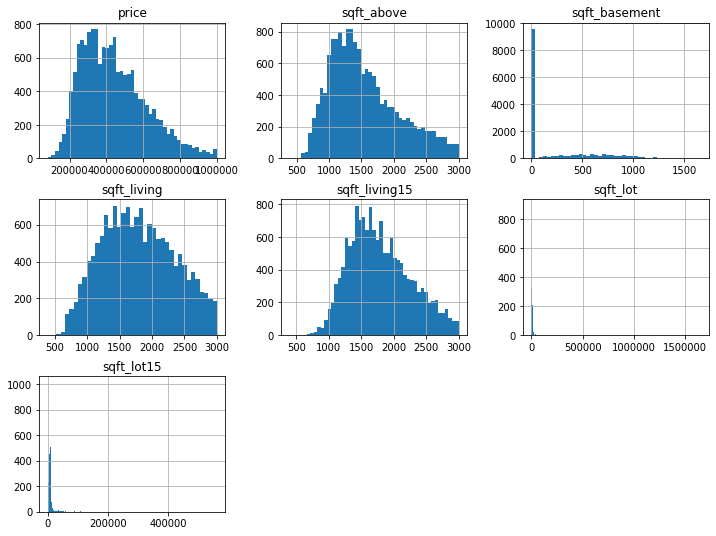

In [56]:
df.hist(column=cont_cols[:-2], layout=(3,3),figsize=(12,9), bins='auto');

Before possibly converting `sqft_basement` to a binary value, I want to investigate what outliers exist in `sqft_lot` and `sqft_lot15`.

In [57]:
df['sqft_lot'].value_counts().sort_index(ascending=False).head(20)

1651359    1
982278     1
715690     1
641203     1
623779     1
577605     1
542322     1
505166     1
501376     1
435600     2
432036     1
426452     1
426450     1
423838     1
415126     1
403365     1
389126     1
385506     1
383328     1
374616     1
Name: sqft_lot, dtype: int64

In [58]:
df['sqft_lot'].describe().round(2)

count      15443.00
mean       12271.06
std        32809.01
min          520.00
25%         4858.50
50%         7306.00
75%         9752.50
max      1651359.00
Name: sqft_lot, dtype: float64

In [59]:
len(df.loc[(df['sqft_lot'] > 30000)]) / len(df)

0.05394029657449977

In [60]:
df.drop(df.loc[(df['sqft_lot'] > 30000)].index, inplace=True)

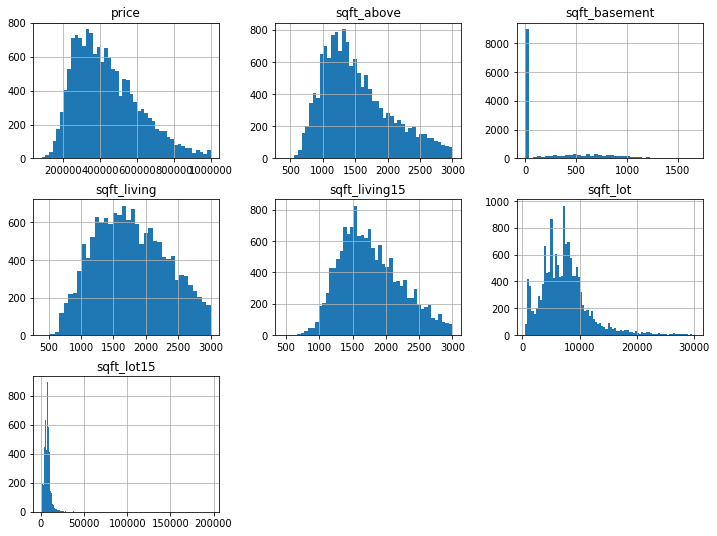

In [61]:
df.hist(column=cont_cols[:-2], layout=(3,3),figsize=(12,9), bins='auto');

In [62]:
df['sqft_lot'].describe().round(2)

count    14610.00
mean      7483.81
std       4299.21
min        520.00
25%       4740.00
50%       7200.00
75%       9292.00
max      29985.00
Name: sqft_lot, dtype: float64

`sqft_lot` is not completely normalized, but I want to avoid dropping too many values from my dataset. I can always return to it later and drop more values if necessary.

In [63]:
df['sqft_lot15'].value_counts().sort_index(ascending=False).head(20)

196591    1
103672    1
101494    1
98445     1
93393     1
91476     1
89595     1
87555     1
87300     1
78408     1
75396     1
74052     1
70973     1
67518     1
61011     1
57428     1
56628     1
53578     2
51400     1
51376     1
Name: sqft_lot15, dtype: int64

In [64]:
df['sqft_lot15'].describe()

count     14610.000000
mean       7425.187885
std        5082.861924
min         651.000000
25%        4800.000000
50%        7210.000000
75%        8960.000000
max      196591.000000
Name: sqft_lot15, dtype: float64

In [65]:
len(df.loc[(df['sqft_lot15'] > 17500)]) / len(df)

0.023066392881587953

In [66]:
df.drop(df.loc[(df['sqft_lot15'] > 17500)].index, inplace=True)

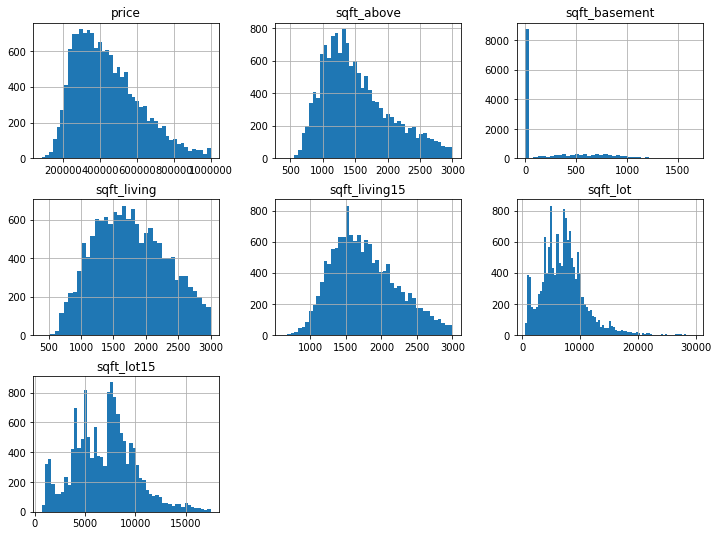

In [67]:
df.hist(column=cont_cols[:-2], layout=(3,3),figsize=(12,9), bins='auto');

In [68]:
df['sqft_basement'].value_counts().sort_values(ascending=False)

0.0       8743
500.0      170
700.0      164
600.0      161
400.0      138
800.0      138
300.0      118
900.0       95
200.0       87
530.0       84
1000.0      80
750.0       79
450.0       79
480.0       78
620.0       69
720.0       68
420.0       64
580.0       64
780.0       60
360.0       59
380.0       59
240.0       59
650.0       58
440.0       58
840.0       57
350.0       56
670.0       56
290.0       56
550.0       56
680.0       55
860.0       55
850.0       54
770.0       54
520.0       52
140.0       50
430.0       50
340.0       50
280.0       50
730.0       49
910.0       48
740.0       47
940.0       47
460.0       47
570.0       46
630.0       46
470.0       45
310.0       45
120.0       44
250.0       44
950.0       44
920.0       43
640.0       43
790.0       43
820.0       42
760.0       42
1010.0      42
390.0       41
560.0       40
540.0       40
510.0       39
830.0       39
1060.0      39
270.0       37
150.0       37
880.0       37
1200.0      37
330.0     

In [69]:
len(df.loc[(df['sqft_basement'] == 0)]) / len(df)

0.6125551741049534

In [70]:
df['sqft_basement'].describe()

count    14273.000000
mean       245.516149
std        363.372423
min          0.000000
25%          0.000000
50%          0.000000
75%        500.000000
max       1660.000000
Name: sqft_basement, dtype: float64

More than 60% of the `sqft_basement` data are zeroes. The min and median are both 0 and the last quartile starts at 500 sqft, while the max is more than 300% of the last quartile threshold. This will most likely skew any sort of linear regression associated with this variable. To avoid this, I will change this column to `basement` which will indicate whether or not the property has a basement.

In [71]:
df['basement'] = df['sqft_basement'].map(lambda x: 1 if x != 0 else 0)

In [72]:
df.drop('sqft_basement',axis=1,inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,basement
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0
6,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,1995,98003,47.3097,-122.327,2238,6819,0


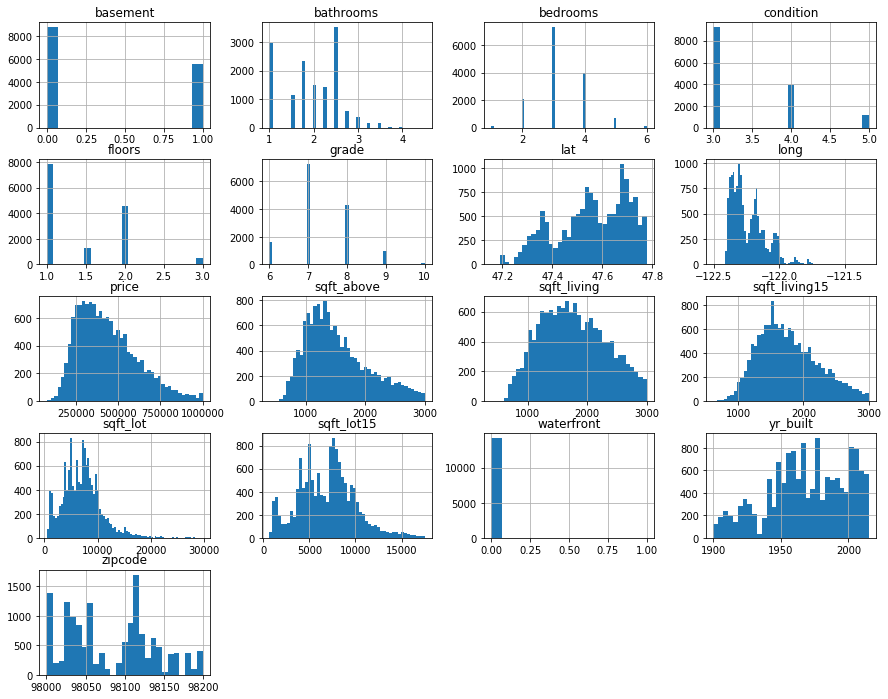

In [73]:
df.hist(bins='auto',figsize=(15,12));

### Dealing with Categorical Variables (Again)



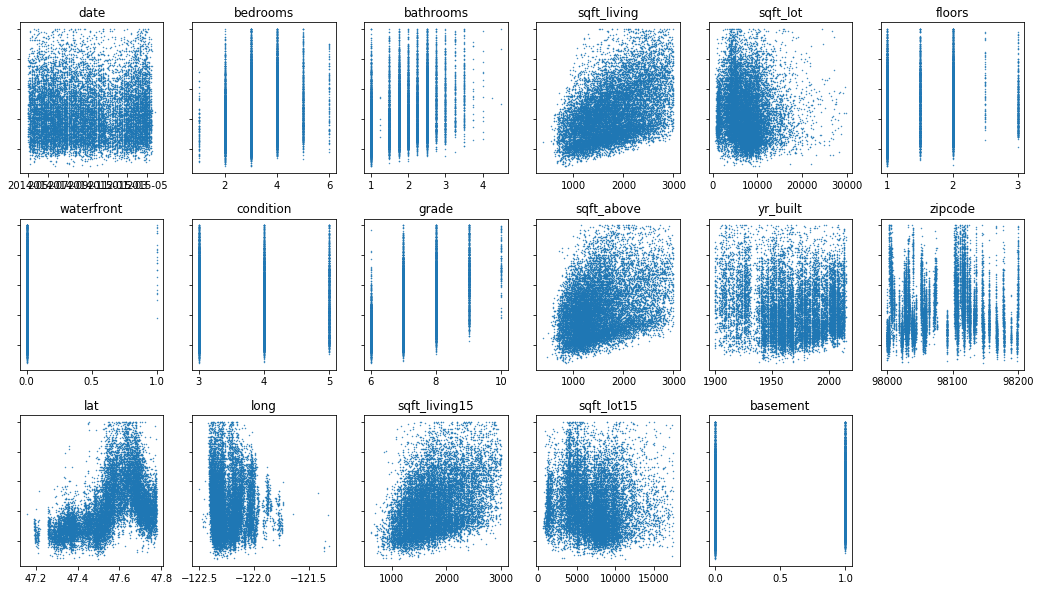

In [74]:
c = []
n = 6

for i in df.columns:
    if df[i].dtype != 'object':
        c.append(i)

c.remove('price')
l = len(c)

fig, axes = plt.subplots(ncols = n, nrows = l // n + 1, figsize = (18,10))

fig.subplots_adjust(hspace=0.3)

for a in range(l):
    ax = axes[a//n][a%n]
    ax.scatter(df[c[a]], df['price'], s=0.2);
    ax.set_yticklabels([])
    ax.set_title(c[a])

spare = n * (l // n + 1) - l

for b in range(spare):
    fig.delaxes(axes[l // n][n - 1 - b])

In [75]:
cat_cols.append('basement')
cat_cols

['bathrooms',
 'bedrooms',
 'condition',
 'floors',
 'grade',
 'waterfront',
 'yr_built',
 'zipcode',
 'basement']

In [76]:
cont_cols.insert(0,'date')
cont_cols

['date',
 'price',
 'sqft_above',
 'sqft_basement',
 'sqft_living',
 'sqft_living15',
 'sqft_lot',
 'sqft_lot15',
 'lat',
 'long']

The scatter plots above show the relationship each variable has with the target variable `price`. The groupings we made earlier needed to be slightly adjusted because of the changes we made to the variables. 

The categorical variables need to be one-hot encoded in order to be able to fit non-ordinal categorical variables into our model. The ordinal variables, or variables that have a clear order to them, are `bathrooms`, `bedrooms`, `condition`, `floors`, `grade`. We know that `condition` and `grade` have an order to them, according to https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r. The remaining categorical values are non-ordinal, including `zipcode`. Although `zipcode` does increase in numerical order, it doesn't necessarily mean one zipcode is better than another, just solely based off of the zipcode number. 

Therefore, the ordinal values can be kept as is, but the remaining variables will have to be encoded.

This includes `waterfront`,`yr_built`, and `basement`. Two of these are binary variables which will be very easy to handle. The `yr_built` column will be a little harder to encode because of the large range of values from 1900 - 2015. In order to categorize these, I will group them by decade.

In [77]:
df['yr_built'].describe()

count    14273.000000
mean      1968.780495
std         29.402897
min       1900.000000
25%       1950.000000
50%       1969.000000
75%       1994.000000
max       2015.000000
Name: yr_built, dtype: float64

The `pandas` function `.cut` can separate values into discrete intervals. This function is also useful when converting from a continuous variable to a categorical variable.

In [78]:
year_bins = pd.cut(df['yr_built'], [1899,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020])
year_bins = year_bins.cat.as_unordered()

In [79]:
year_dummies = pd.get_dummies(year_bins, prefix='year')
water_dummies = pd.get_dummies(df['waterfront'], prefix='water')
base_dummies = pd.get_dummies(df['basement'], prefix='base')

In [80]:
df.drop(['yr_built','waterfront','basement'], axis=1, inplace=True)
df = pd.concat([df, year_dummies, water_dummies, base_dummies], axis=1)
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_(1899, 1910]', 'year_(1910, 1920]',
       'year_(1920, 1930]', 'year_(1930, 1940]', 'year_(1940, 1950]',
       'year_(1950, 1960]', 'year_(1960, 1970]', 'year_(1970, 1980]',
       'year_(1980, 1990]', 'year_(1990, 2000]', 'year_(2000, 2010]',
       'year_(2010, 2020]', 'water_0.0', 'water_1.0', 'base_0', 'base_1'],
      dtype='object')

In [81]:
df.drop(['water_0.0','base_0','year_(1899, 1910]'], axis=1, inplace=True)
# the first encoded variable needs to be dropped in order to avoid the dummy variable trap

In [82]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,"year_(1910, 1920]","year_(1920, 1930]","year_(1930, 1940]","year_(1940, 1950]","year_(1950, 1960]","year_(1960, 1970]","year_(1970, 1980]","year_(1980, 1990]","year_(1990, 2000]","year_(2000, 2010]","year_(2010, 2020]",water_1.0,base_1
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,98125,47.7210,-122.319,1690,7639,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,98028,47.7379,-122.233,2720,8062,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,98136,47.5208,-122.393,1360,5000,0,0,0,0,0,1,0,0,0,0,0,0,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,98074,47.6168,-122.045,1800,7503,0,0,0,0,0,0,0,1,0,0,0,0,0
6,2014-06-27,257500.0,3,2.25,1715,6819,2.0,3,7,1715,98003,47.3097,-122.327,2238,6819,0,0,0,0,0,0,0,0,1,0,0,0,0


Now that the categorical and continuous variables have been taken care of, I can check for __multicollinearity__ to avoid coefficients that have a large correlation value with one another. The only other variable left is `date`, which indicates the sale date of the property. I could possibly do something similar to what I did for `yr_built` and encode the `date` column. 

As I mentioned before, `.cut` can be useful when converting a continuous variable into a categorical one. It wouldn't make much sense to group `date` by year as the data set only covers a period of 12 months. Instead, binning the values by month may help the accuracy of our final model, assuming that there is a correlation between month and sale price.

## EDA 1: Does the date of the sale have a significant effect on the price of the house?

In [83]:
df['date'].describe()

count                   14273
unique                    367
top       2014-06-25 00:00:00
freq                       91
first     2014-05-02 00:00:00
last      2015-05-24 00:00:00
Name: date, dtype: object

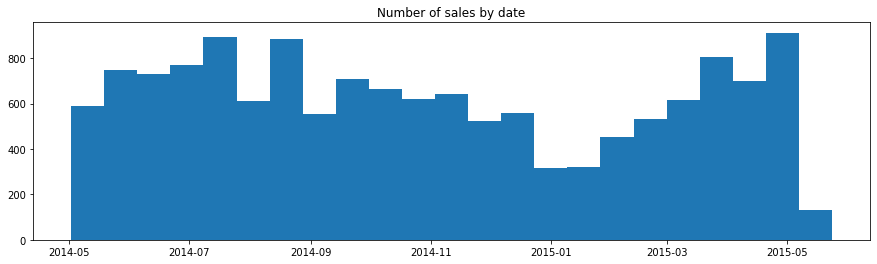

In [84]:
plt.figure(figsize = (15,4))
plt.hist(df['date'],bins = 'auto');
plt.title('Number of sales by date');
plt.show();

This histogram does not seem to show a correlation between the date and the number of house sales. I am not confident enough to draw a correlation between month and sales with this information. The histogram of sales by month could refine this data and potentially show a stronger correlation.

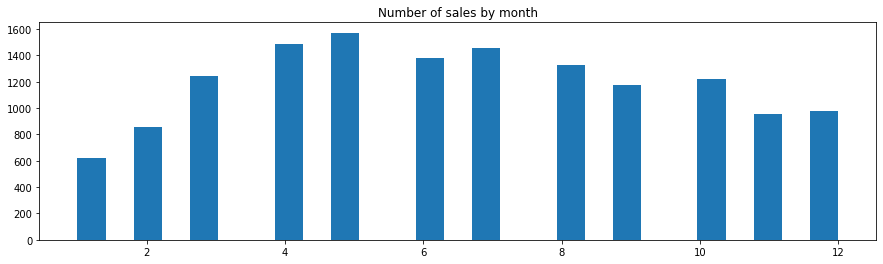

In [85]:
plt.figure(figsize = (15,4))
plt.hist(df['date'].map(lambda x: x.month),bins = 'auto');
plt.title('Number of sales by month');
plt.show();

There does seem to be some correlation between the month and the number of sales. However, the dataset ranges from May 2014 to the end of May 2015. This means that May will have double the data points, potentially, of the other months. Because of this irregularity, I will not use be using the dates that the houses were sold.

In [86]:
len(df.loc[(df['date'] > '2015-05-02')])

380

A possible work around would be to drop all of the data beyond 2015-05-02 in order to remove any overlapping month data. I could also drop anything before 2014-05-24, but I have already removed so many data points that I want to avoid dropping any more rows. This route will possibly be investigated later to determine if these values can increase the accuracy of our model.

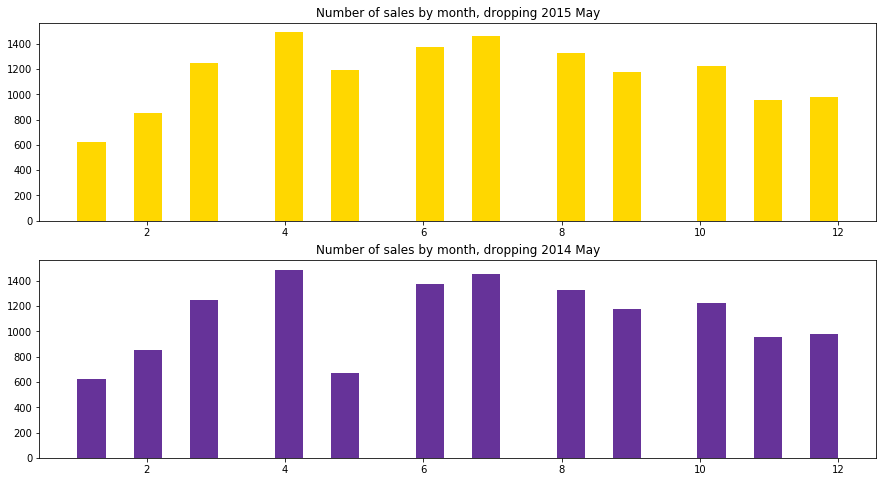

In [87]:
fig = plt.figure(figsize = (15,8))

ax = fig.add_subplot(211)
ax.hist(df.loc[(df['date'] < '2015-05-03'), 'date'].map(lambda x: x.month),bins = 'auto', color='gold')
plt.title('Number of sales by month, dropping 2015 May')

purple = '#663399'
ax2 = fig.add_subplot(212)
ax2.hist(df.loc[(df['date'] > '2014-05-24'), 'date'].map(lambda x: x.month),bins = 'auto', color=purple)
plt.title('Number of sales by month, dropping 2014 May')

plt.show();

In [88]:
df_drop = pd.DataFrame(data=df['date'])
df_drop

,date
1,2014-12-09
2,2015-02-25
3,2014-12-09
4,2015-02-18
6,2014-06-27
...,...
21588,2015-01-26
21589,2014-10-14
21591,2015-02-19
21592,2014-05-21


In [89]:
df.drop('date',axis=1,inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,"year_(1910, 1920]","year_(1920, 1930]","year_(1930, 1940]","year_(1940, 1950]","year_(1950, 1960]","year_(1960, 1970]","year_(1970, 1980]","year_(1980, 1990]","year_(1990, 2000]","year_(2000, 2010]","year_(2010, 2020]",water_1.0,base_1
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,98125,47.7210,-122.319,1690,7639,0,0,0,0,1,0,0,0,0,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,3,6,770,98028,47.7379,-122.233,2720,8062,0,0,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,98136,47.5208,-122.393,1360,5000,0,0,0,0,0,1,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,98074,47.6168,-122.045,1800,7503,0,0,0,0,0,0,0,1,0,0,0,0,0
6,257500.0,3,2.25,1715,6819,2.0,3,7,1715,98003,47.3097,-122.327,2238,6819,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,429000.0,3,2.00,1490,1126,3.0,3,8,1490,98144,47.5699,-122.288,1400,1230,0,0,0,0,0,0,0,0,0,0,1,0,0
21589,610685.0,4,2.50,2520,6023,2.0,3,9,2520,98056,47.5137,-122.167,2520,6023,0,0,0,0,0,0,0,0,0,0,1,0,0
21591,475000.0,3,2.50,1310,1294,2.0,3,8,1180,98116,47.5773,-122.409,1330,1265,0,0,0,0,0,0,0,0,0,1,0,0,1
21592,360000.0,3,2.50,1530,1131,3.0,3,8,1530,98103,47.6993,-122.346,1530,1509,0,0,0,0,0,0,0,0,0,1,0,0,0


## EDA 2: How does the geographic location of a house affect its price?

Then next variables that I need to evaluate are `lat` and `long`. These variables will most likely be dropped at this time because of the nature of their values. Although the numbers are continuous, they do not have a linear relationship. A larger value for `lat` or `long` doesn't mean a better latitude or longitude. For this reason, I will drop the `lat` and `long` columns and instead focus on `zipcode` and categorize them by neighborhoods. Zipcode and neighborhood data can be found at https://aqua.kingcounty.gov/gis/web/VMC/boundaries/zipcodes/zipcodes.pdf and http://www.agingkingcounty.org/wp-content/uploads/sites/185/2016/09/SubRegZipCityNeighborhood.pdf. 

There are a few zipcodes that encompass multiple neighborhoods. Therefore, the neighborhoods will be grouped by general area, according to the map data, which will combine areas with overlapping zipcodes.

Before dropping `lat` and `long`, we can map the two variables in a scatterplot to see how the geographic area affects the price of the house. Below, it is clear that there is a correlation between coordinates of a house and its price. Mercer Island, in the middle of Lake Washington, has a cluster of darker data points, indicating a higher number of expensive houses (> $1 million). The properties in Seattle that are along the shores of Lake Washington also seem to be pricier than the houses in the neighborhoods below. As you travel south in King County towards the Auburn and Kent neighborhoods, there is a significant decrease in average house cost.

The scatterplot below confirms that there is a relationship between a property's geographic location and its price. However, because of the linear nature of `lat` and `long`, they cannot be used for a linear regression model.

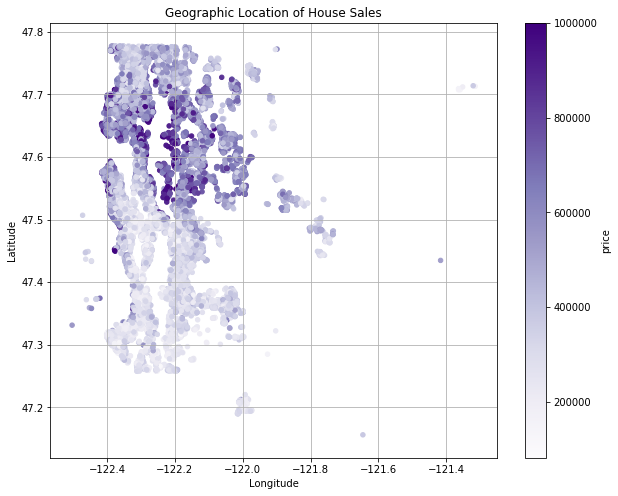

In [107]:
fig,ax1=plt.subplots()
df.plot.scatter(
                x='long',y='lat', c = 'price', cmap='Purples', 
                alpha=1.5, figsize=(10,8), grid=True, ax=ax1
                )
plt.title('Geographic Location of House Sales')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [108]:
# Includes Seattle, Shoreline, Lake Forest Park
zipA = [98177, 98160, 98155, 98133, 98125, 98115, 98103, 98117, 
        98107, 98199, 98119, 98102, 98109, 98112, 98185, 98105, 
        98195, 98145, 98181, 98181, 98154, 98164, 98121, 98101,
        98104, 98122, 98134, 98124, 98144, 98116, 98136, 98126, 
        98106, 98108, 98118, 98178]

# Includes Kenmore, Bothell, Woodinville, Redmond, Kirkland
zipB = [98028, 98041, 98011, 98072, 98014, 98052, 98053, 98034, 98033, 98083, 98077]

# Includes Bellevue, Mercer Island, Medina
zipC = [98039, 98004, 98009, 98015, 98005, 98007, 98008, 98006, 98040]

# Includes Duvall, Carnation, Snoqualmie, Northbend
zipD = [98019, 98014, 98065, 98045, 98024]

# Includes Sammamish, Issaquah
zipE = [98074, 98075, 98029, 98027]

# Includes Newcastle, Renton
zipF = [98059, 98056, 98057, 98055, 98058]

# Includes Burien, Normandy Park, SeaTac, Tukwila, Vashon Island, Des Moines
zipG = [98146, 98168, 98062, 98166, 98158, 98148, 98188, 98168,
        98138, 98070, 98198]

# Includes Kent, Covington
zipH = [98032, 98031, 98035, 98064, 98030, 98042]

# Includes Federal Way, Algona, Auburn, Pacific, Milton
zipI = [98023, 98063, 98003, 98047, 98071, 98001, 98093, 98002, 98092]

# Includes Maple Valley, Black Diamond, Enumclaw
zipJ = [98038, 98010, 98025, 98022]

In [109]:
def zip_neighborhood(x):
    
    
    """ Input: King County zipcodes
    
        Output: Categorize the zipcode into one of the above groups, based on proximity to one another
    
    """
    if x in zipA:
        return 'A'
    elif x in zipB:
        return 'B'
    elif x in zipC:
        return 'C'
    elif x in zipD:
        return 'D'
    elif x in zipE:
        return 'E'
    elif x in zipF:
        return 'F'
    elif x in zipG:
        return 'G'
    elif x in zipH:
        return 'H'
    elif x in zipI:
        return 'I'
    elif x in zipJ:
        return 'J'
    else:
        return 'Not Found'
        

In [110]:
df.to_csv('df_not_dropped.csv') # saving df before applying function, in case of major error

In [111]:
df['zip_nbh'] = df['zipcode'].apply(zip_neighborhood)

In [112]:
df['zip_nbh'].value_counts().sort_index()

A    5909
B    1725
C     825
D     416
E     713
F    1045
G     959
H     888
I    1236
J     557
Name: zip_nbh, dtype: int64

In [113]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,"year_(1910, 1920]","year_(1920, 1930]","year_(1930, 1940]","year_(1940, 1950]","year_(1950, 1960]","year_(1960, 1970]","year_(1970, 1980]","year_(1980, 1990]","year_(1990, 2000]","year_(2000, 2010]","year_(2010, 2020]",water_1.0,base_1,zip_nbh
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,98125,47.7210,-122.319,1690,7639,0,0,0,0,1,0,0,0,0,0,0,0,1,A
2,180000.0,2,1.00,770,10000,1.0,3,6,770,98028,47.7379,-122.233,2720,8062,0,0,1,0,0,0,0,0,0,0,0,0,0,B
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,98136,47.5208,-122.393,1360,5000,0,0,0,0,0,1,0,0,0,0,0,0,1,A
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,98074,47.6168,-122.045,1800,7503,0,0,0,0,0,0,0,1,0,0,0,0,0,E
6,257500.0,3,2.25,1715,6819,2.0,3,7,1715,98003,47.3097,-122.327,2238,6819,0,0,0,0,0,0,0,0,1,0,0,0,0,I


In [114]:
zip_dummies = pd.get_dummies(df['zip_nbh'], prefix='zip_', drop_first=True)

In [115]:
df = pd.concat([df, zip_dummies], axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,"year_(1910, 1920]","year_(1920, 1930]","year_(1930, 1940]","year_(1940, 1950]","year_(1950, 1960]","year_(1960, 1970]","year_(1970, 1980]","year_(1980, 1990]","year_(1990, 2000]","year_(2000, 2010]","year_(2010, 2020]",water_1.0,base_1,zip_nbh,zip__B,zip__C,zip__D,zip__E,zip__F,zip__G,zip__H,zip__I,zip__J
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,98125,47.7210,-122.319,1690,7639,0,0,0,0,1,0,0,0,0,0,0,0,1,A,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,3,6,770,98028,47.7379,-122.233,2720,8062,0,0,1,0,0,0,0,0,0,0,0,0,0,B,1,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,98136,47.5208,-122.393,1360,5000,0,0,0,0,0,1,0,0,0,0,0,0,1,A,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,98074,47.6168,-122.045,1800,7503,0,0,0,0,0,0,0,1,0,0,0,0,0,E,0,0,0,1,0,0,0,0,0
6,257500.0,3,2.25,1715,6819,2.0,3,7,1715,98003,47.3097,-122.327,2238,6819,0,0,0,0,0,0,0,0,1,0,0,0,0,I,0,0,0,0,0,0,0,1,0


In [116]:
df.drop(columns=['zip_nbh', 'zipcode','lat','long'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_living15,sqft_lot15,"year_(1910, 1920]","year_(1920, 1930]","year_(1930, 1940]","year_(1940, 1950]","year_(1950, 1960]","year_(1960, 1970]","year_(1970, 1980]","year_(1980, 1990]","year_(1990, 2000]","year_(2000, 2010]","year_(2010, 2020]",water_1.0,base_1,zip__B,zip__C,zip__D,zip__E,zip__F,zip__G,zip__H,zip__I,zip__J
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1690,7639,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,3,6,770,2720,8062,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1360,5000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1800,7503,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,257500.0,3,2.25,1715,6819,2.0,3,7,1715,2238,6819,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


The last 2 columns that haven't been cleaned is `sqft_living15` and `sqft_lot15`. By looking at their scatterplots, we can determine that `sqft_lot15` does not follow the linearity assumption for linear regression. There must be a __linear relationship__ between the dependent and independent variable, meaning a change in 1 unit of $X$ should result in a change in 1 unit of $Y$. For this reason, I will drop `sqft_lot15`.

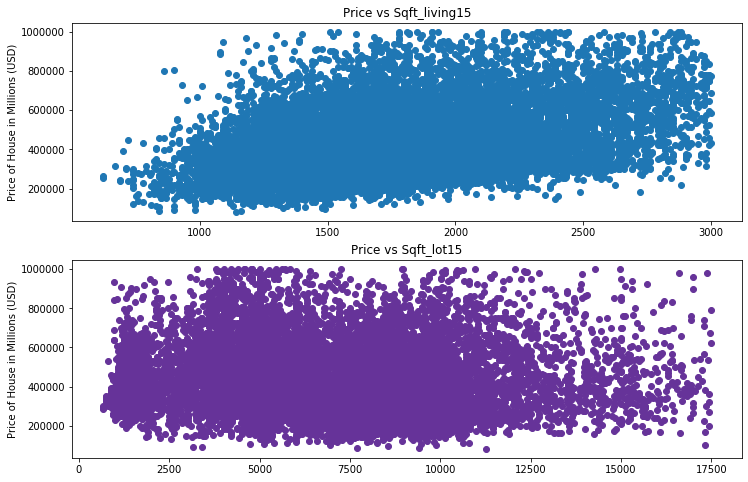

In [117]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(211)
ax.scatter('sqft_living15', 'price', data=df);
ax.set_title('Price vs Sqft_living15')
ax.set_ylabel('Price of House in Millions (USD)')

ax1 = fig.add_subplot(212)
ax1.scatter('sqft_lot15', 'price', data=df, c = purple);
ax1.set_title('Price vs Sqft_lot15')
ax1.set_ylabel('Price of House in Millions (USD)')

plt.show()

In [118]:
df.drop('sqft_lot15', axis=1, inplace=True)

In [119]:
df.columns = list(map(lambda x: 
                      x.replace('(','').replace(']','').replace('_1.0','side').replace(', ','_'),
                      df.columns))

## Checking Linear Regression Assumptions

In [120]:
df_feat = df.drop('price',axis=1)

pred_sum = '+'.join(df_feat.columns)
formula = 'price' + '~' + pred_sum
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     1053.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:41:33   Log-Likelihood:            -1.8413e+05
No. Observations:               14273   AIC:                         3.683e+05
Df Residuals:                   14241   BIC:                         3.686e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.387e+05   1.18e+04    -20.148      0.000   -2.62e+05   -2.15e+05
bedrooms       -7313.7472   1331.803     -5.492      0.000   -9924.255   -4703.239
bathrooms       1.274e+04   2155.326      5.911      0.000    8516.090     1.7e+04
sqft_living       50.9717      4.814     10.589      0.000      41.536      60.407
sqft_lot          -2.0835      0.292     -7.142      0.000      -2.655      -1.512
floors          6502.6150   2566.704      2.533      0.011    1471.539    1.15e+04
condition        2.67e+04   1444.866     18.481      0.000    2.39e+04    2.95e+04
grade            6.51e+04   1536.424     42.369      0.000    6.21e+04    6.81e+04
sqft_above        45.6608      5.240      8.714      0.000      35.390      55.931
sqft_living15     48.8641      2.690     18.164      0.000      43.591      54.137
year_1910_1920 -1.354e+04   5836.402     -2.319      0.020    -2.5e+04   -2096.221
year_1920_1930 -4140.1520   5312.603     -0.779      0.436   -1.46e+04    6273.244
year_1930_1940 -2.923e+04   6484.469     -4.507      0.000   -4.19e+04   -1.65e+04
year_1940_1950 -5.755e+04   5013.612    -11.478      0.000   -6.74e+04   -4.77e+04
year_1950_1960  -9.13e+04   4974.016    -18.356      0.000   -1.01e+05   -8.16e+04
year_1960_1970 -1.112e+05   5158.438    -21.557      0.000   -1.21e+05   -1.01e+05
year_1970_1980 -1.287e+05   5361.728    -24.010      0.000   -1.39e+05   -1.18e+05
year_1980_1990 -1.192e+05   5486.239    -21.724      0.000    -1.3e+05   -1.08e+05
year_1990_2000 -1.281e+05   5742.745    -22.311      0.000   -1.39e+05   -1.17e+05
year_2000_2010 -1.407e+05   5463.283    -25.748      0.000   -1.51e+05    -1.3e+05
year_2010_2020 -1.207e+05   6375.444    -18.934      0.000   -1.33e+05   -1.08e+05
waterside       2.772e+05      2e+04     13.842      0.000    2.38e+05    3.16e+05
base_1          2.656e+04   3388.561      7.839      0.000    1.99e+04    3.32e+04
zip__B          7945.6778   3291.511      2.414      0.016    1493.886    1.44e+04
zip__C          9.997e+04   4147.545     24.103      0.000    9.18e+04    1.08e+05
zip__D         -7.721e+04   5450.848    -14.165      0.000   -8.79e+04   -6.65e+04
zip__E         -2625.9583   4336.577     -0.606      0.545   -1.11e+04    5874.298
zip__F         -1.345e+05   3745.313    -35.906      0.000   -1.42e+05   -1.27e+05
zip__G         -1.325e+05   3659.803    -36.193      0.000    -1.4e+05   -1.25e+05
zip__H          -1.88e+05   4039.545    -46.544      0.000   -1.96e+05    -1.8e+05
zip__I         -2.036e+05   3600.834    -56.545      0.000   -2.11e+05   -1.97e+05
zip__J         -1.652e+05   4831.827    -34.189      0.000   -1.75e+05   -1.56e+05
==============================================================================
Omnibus:                      996.267   Durbin-Watson:                   1.986
Prob(Omnibus):      

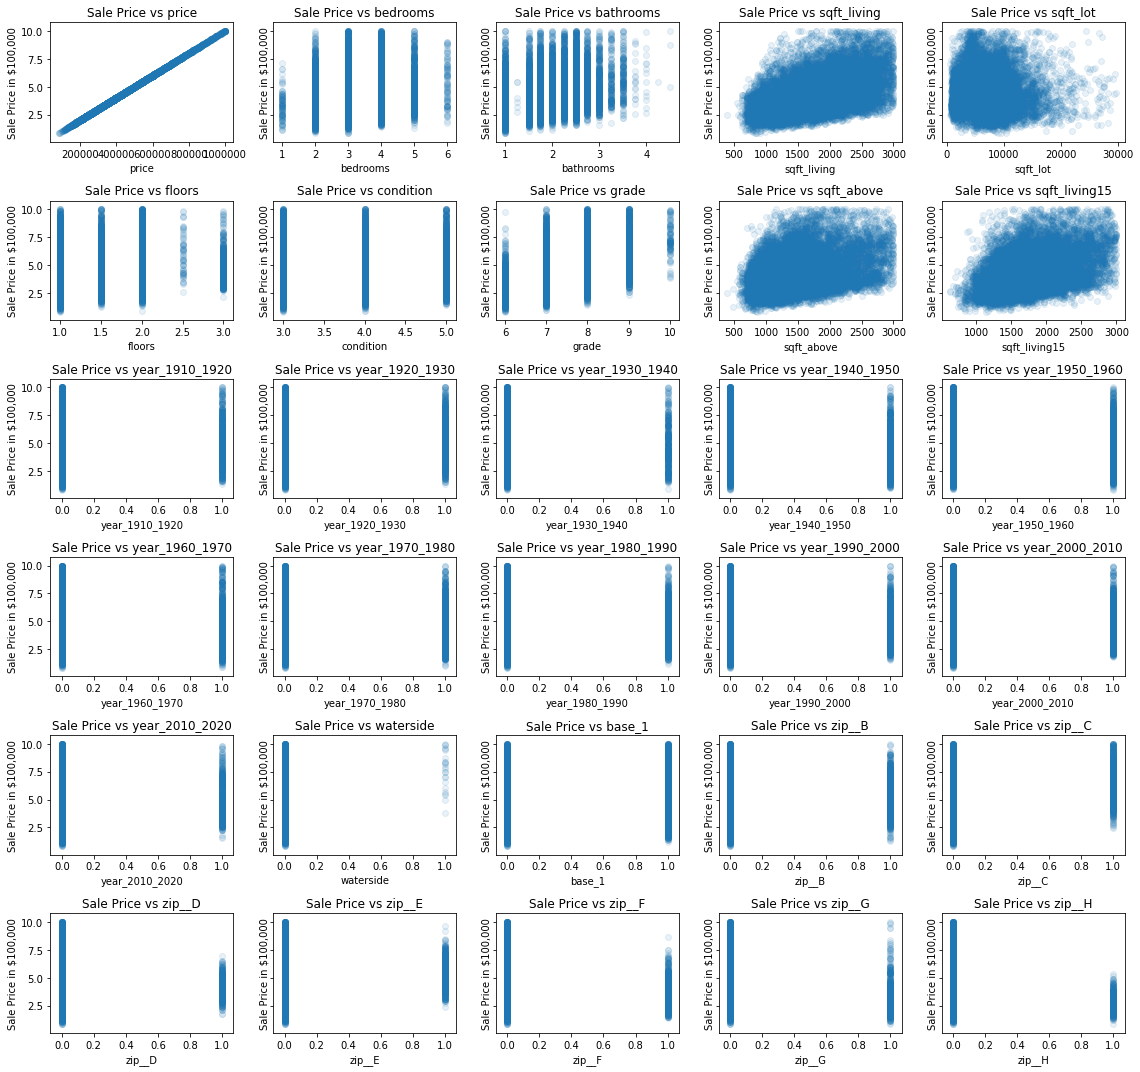

In [121]:
# Your code here 
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=0.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')
    
fig.tight_layout()

Before assuming a multilinear regression model, we have to check if there are any single variable relationships with `price` that could give us an accurate model. While checking the $R^2$ of each continuous variable, I will also be checking to make sure that each one meets the linear regression assumptions of linearity, normality, and homoscedasticity. 

King County Housing Dataset - Regression Analysis for price~sqft_living
Working formula: price~sqft_living
-----------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     4054.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:41:38   Log-Likelihood:            -1.9085e+05
No. Observations:               14273   AIC:                         3.817e+05
Df Residuals:                   14271   BIC:                         3.817e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
             

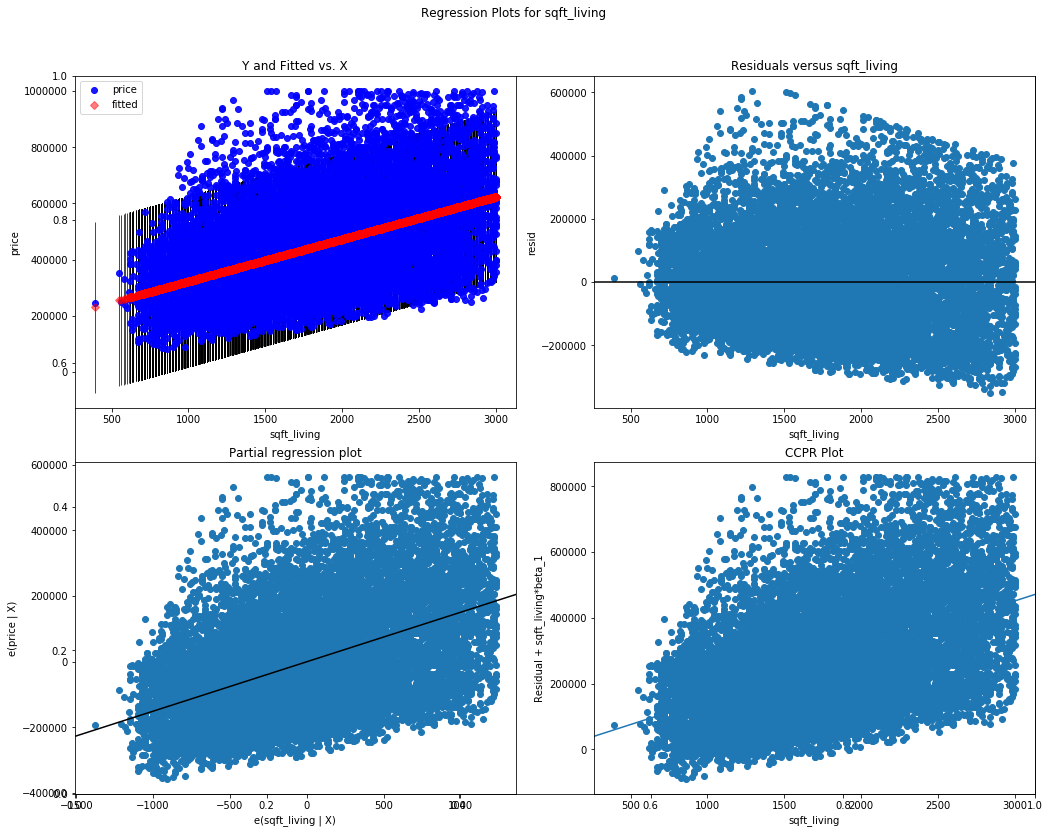

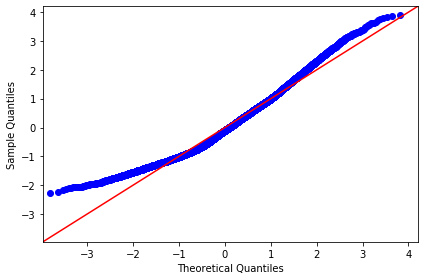

King County Housing Dataset - Regression Analysis for price~sqft_above
Working formula: price~sqft_above
-----------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     1842.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:41:40   Log-Likelihood:            -1.9177e+05
No. Observations:               14273   AIC:                         3.835e+05
Df Residuals:                   14271   BIC:                         3.836e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
               

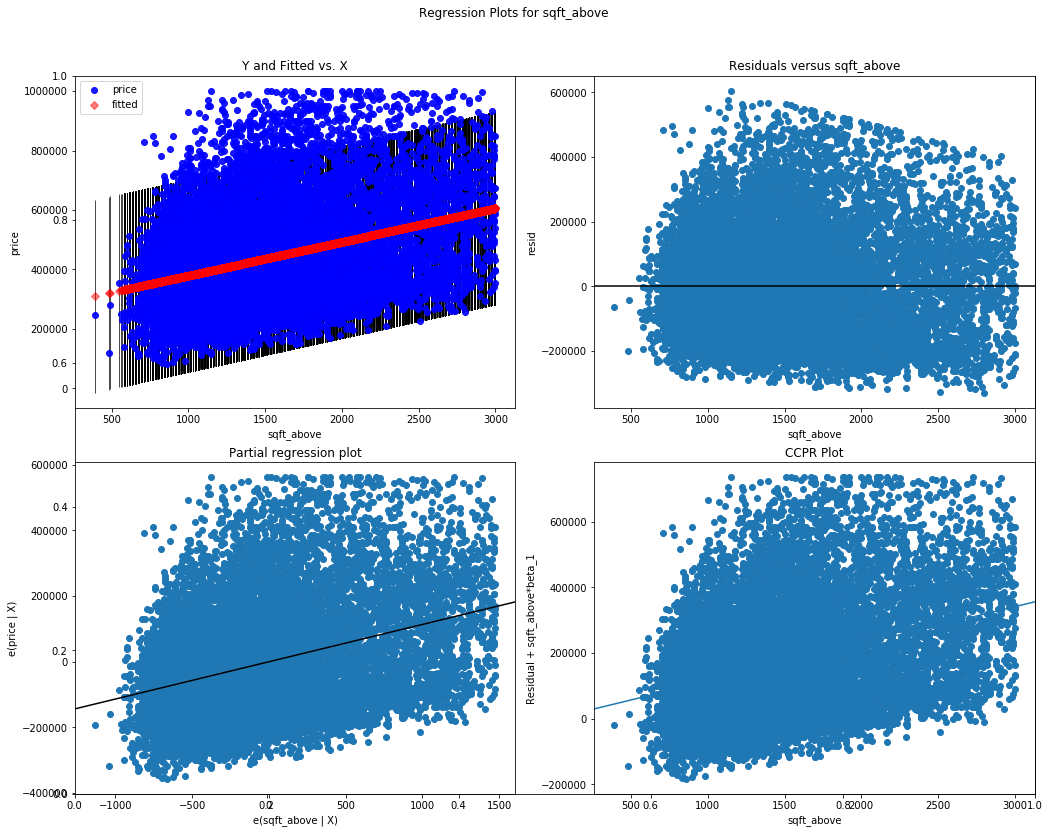

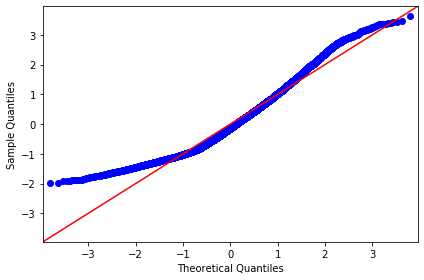

King County Housing Dataset - Regression Analysis for price~sqft_lot
Working formula: price~sqft_lot
-----------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     98.98
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           3.03e-23
Time:                        17:41:41   Log-Likelihood:            -1.9258e+05
No. Observations:               14273   AIC:                         3.852e+05
Df Residuals:                   14271   BIC:                         3.852e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 co

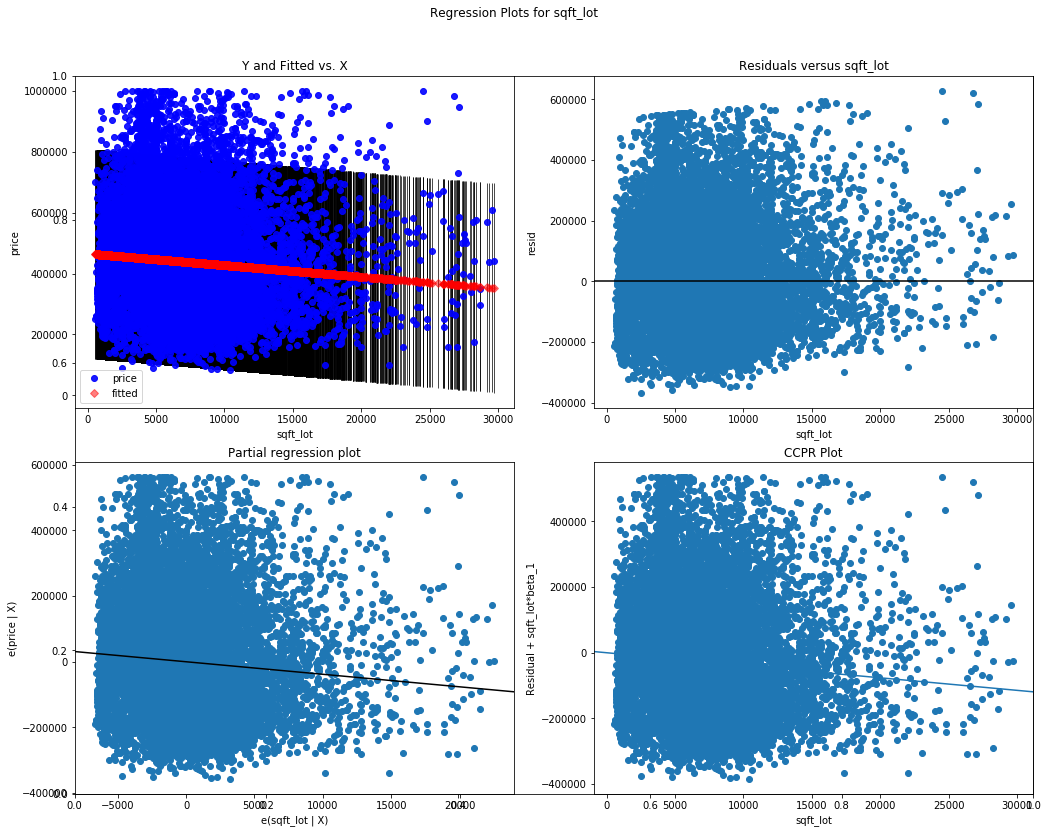

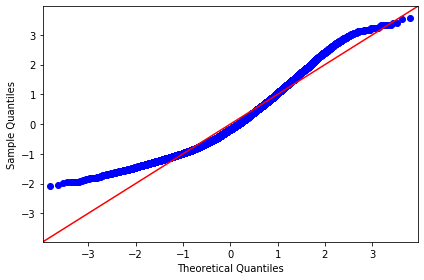

King County Housing Dataset - Regression Analysis for price~sqft_living15
Working formula: price~sqft_living15
-----------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2938.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:41:43   Log-Likelihood:            -1.9130e+05
No. Observations:               14273   AIC:                         3.826e+05
Df Residuals:                   14271   BIC:                         3.826e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
         

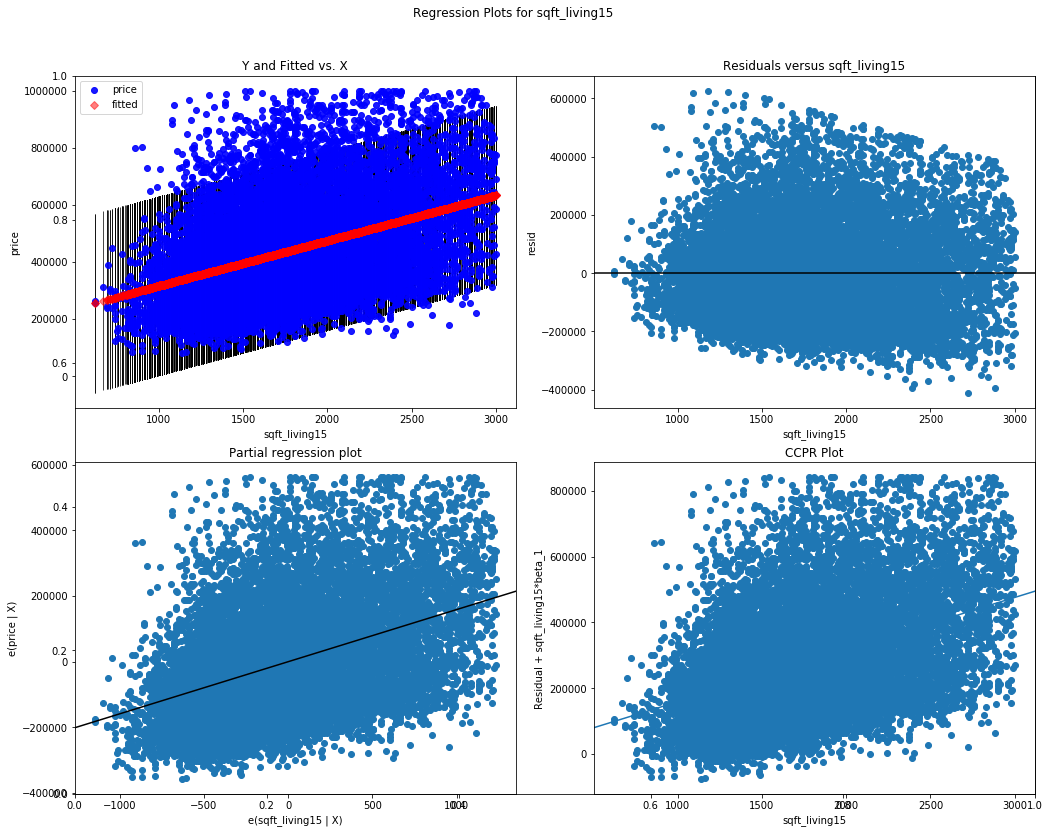

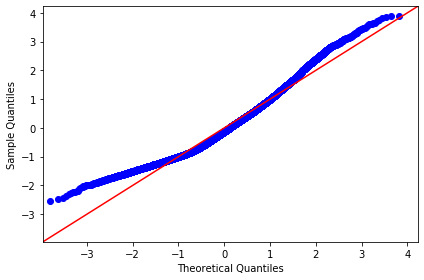

In [122]:
results = []
for col in ['sqft_living','sqft_above', 'sqft_lot','sqft_living15']:
    f = f'price~{col}'

    print(f'King County Housing Dataset - Regression Analysis for price~{col}')
    print(f'Working formula: {f}')
    print("-----------------------------------------------------------------------------------------")
    
    model = ols(formula=f, data=df).fit()
    print(model.summary())
    
    name = ['Jarque-Bera', 'Prob', 'Skew', 'Kurtosis']
    test = sms.jarque_bera(model.resid)
    print(list(zip(name,test)))

    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([col, model.rsquared, model.params[0], model.params[1], 
                    model.pvalues[1], sms.jarque_bera(model.resid)[0]])
    

In [123]:
pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope','p-value','normality(JB)'])

,ind_var,r_squared,intercept,slope,p-value,normality(JB)
0,sqft_living,0.221230,172021.459612,150.493086,0.000000e+00,875.864474
1,sqft_above,0.114321,265297.487041,113.543876,0.000000e+00,1115.894795
2,sqft_lot,0.006888,465860.479363,-3.816884,3.031472e-23,1382.812980
3,sqft_living15,0.170725,157892.543877,158.754111,0.000000e+00,1156.715646


## Investigating Results of Single Regression Models and Regression Diagnostics

Immediately, we can see that none of these individual variables would be sufficient for a single variable model. The largest $R^2$ out of the 4 continuous variables was 0.22, meaning only 22% of the change in `price` can be explained by the change in `sqft_living`. 

Looking at the Q-Q plots for each variable, we can see that all of them show right skew, which we also saw in the histograms for the continuous variables, meaning they do not follow a perfectly normal distribution. This result is also illustrated in the JB test in the dataframe column `normality(JB)`. This indicates that the results could be improved if we can transform the data using non-linear transformations so that it more closely follows a normal distribution. 

The linearity assumption is also checked using `sm.graphics.plot_regress_exog()` function of statsmodels. The first plot, Y and Fitted vs. X, shows the relationship between the independent and dependent variables. In order for the linearity assumption to hold true, the scatter plot must show a pattern between X and Y increasing at the same rate. Analyzing the plots, we can see that the __Y and Fitted vs. X__ plot for `sqft_lot` does not show a clear linear relationship. This also coincides with our previous assumption that `sqft_lot15` did not show a linear relationship and therefore, we dropped it. In this case, `sqft_lot` will be investigated further as outliers can heavily influence the linear assumption.

The final assumption for linear regression is to check for homoscedasticity. This can be achieved using the __Residuals vs {variable}__ plots generated by `sm.graphics.plot_regress_exog()`. This graph shows the model's errors versus the predictor variable being measured. If the distance between the observed values (dots) and the grey line (mean of observed values) shows no pattern, the homoscedasticity assumption will hold. Although all of them show at least some heteroscedasticity, once again `sqft_lot` shows the worst results. As the size of the lot increases, the residuals start to taper off and become much more narrow, compared to the wide band of dots it had towards the origin of the graph. Since `sqft_lot` does not show a linear relationship and does not meet the homoscedasticity assumption, we will drop the column if we cannot correct its plot.

In [124]:
df['sqft_lot'].describe()

count    14273.000000
mean      7196.980663
std       3823.567272
min        520.000000
25%       4653.000000
50%       7095.000000
75%       9070.000000
max      29735.000000
Name: sqft_lot, dtype: float64

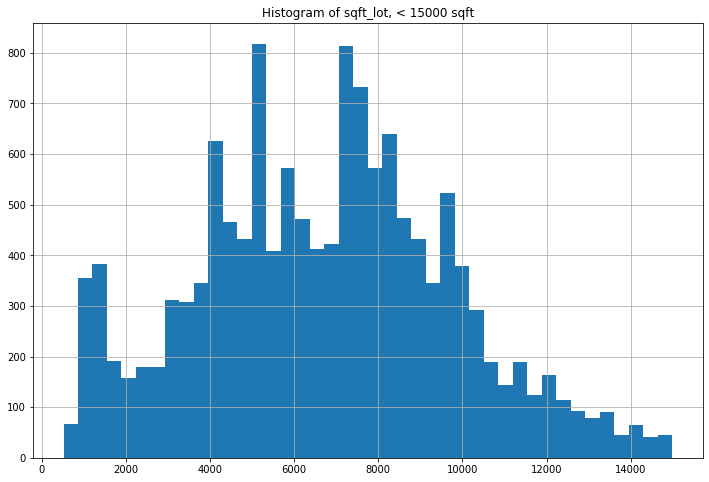

In [125]:
df.loc[(df['sqft_lot'] < 15000), 'sqft_lot'].hist(bins='auto',figsize=(12,8))
plt.title('Histogram of sqft_lot, < 15000 sqft');

In [126]:
df.to_csv('df_before_trans.csv') # save df again in case of log transformation error

In [127]:
test = df.loc[(df['sqft_lot'] < 15000)]

In [128]:
test['log_lot'] = np.log(test['sqft_lot'])

/Users/scott/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


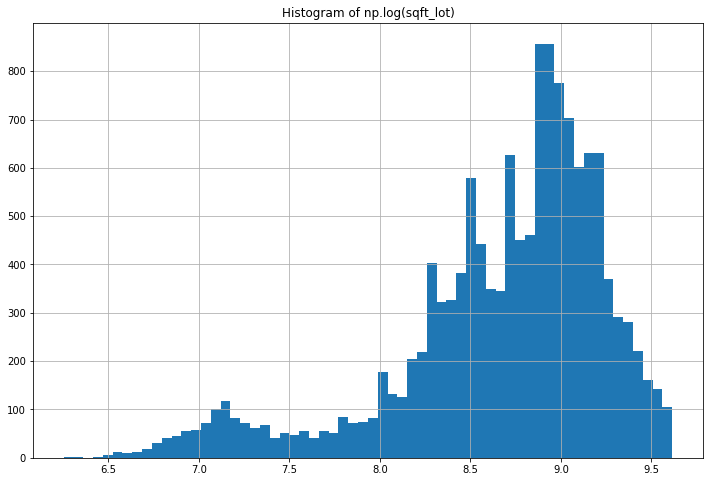

In [129]:
test['log_lot'].hist(bins='auto', figsize=(12,8))
plt.title('Histogram of np.log(sqft_lot)');

In [130]:
f = 'price~log_lot'

model2 = ols(formula=f, data=test).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     149.1
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           4.04e-34
Time:                        17:41:45   Log-Likelihood:            -1.8469e+05
No. Observations:               13693   AIC:                         3.694e+05
Df Residuals:                   13691   BIC:                         3.694e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.045e+05   2.19e+04     32.211      0.000    6.62e+05    7.47e+05
log_lot    -3.072e+04   2515.710    -12.212      0.000   -3.57e+04   -2.58e+04
==============================================================================
Omnibus:                     1079.149   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1353.478
Skew:                           0.767   Prob(JB):                    1.25e-294
Kurtosis:                       3.133   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

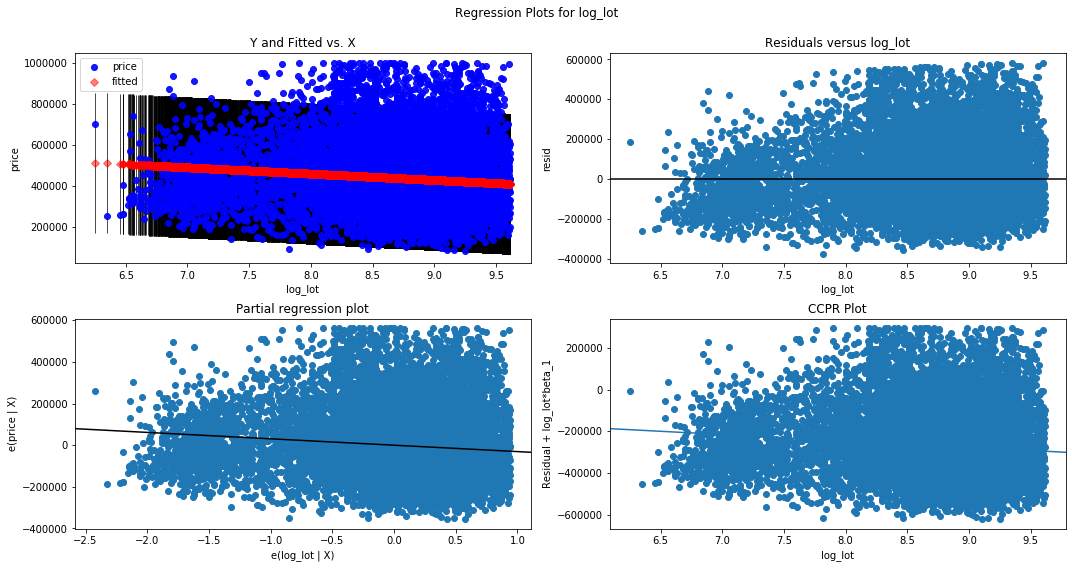

In [131]:
fig2 = plt.figure(figsize=(15,8))
fig2 = sm.graphics.plot_regress_exog(model2, "log_lot", fig=fig2)
plt.show()

In [132]:
test['sq'] = (test['sqft_lot'] ** 2)

/Users/scott/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


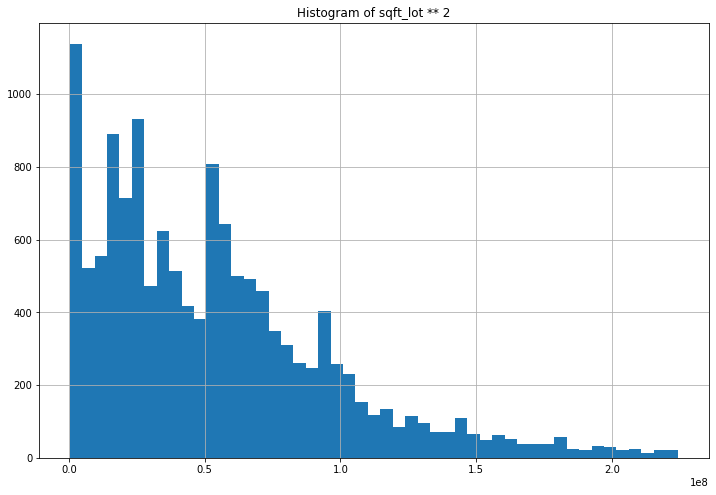

In [133]:
test['sq'].hist(bins='auto', figsize=(12,8))
plt.title('Histogram of sqft_lot ** 2');

## EDA 3: Does the size of the property's lot have a significant effect on its price?

The original histogram of `sqft_lot` showed heavy positive skewness. After dropping outliers, the histogram did not show a normal distribution. The scatterplot, as mentioned before, did not show a linear relationship with the `price` of the property. A linear relationship is necessary for a linear regression model, therefore we could not use `sqft_lot` as is.

After transforming the plots of `sqft_lot` using a log and a square transformation, the resulting histograms did not show an increase in normality. Due to its low $R^2$ in relation to `price`, as well as not being able to normalize well, I will drop `sqft_lot` from the dataset. We can say that the size of the lot __does not__ have a significant effect on its price.

In [134]:
df.to_csv('df_w_sqftlot.csv')

In [135]:
df.drop('sqft_lot', axis=1, inplace=True)

## Checking for Multicollinearity

Another relationship we must consider between all of the features we have is __multicollinearity__. When a model has too many features that are correlated to each other, any small change in the working model could result in a very large change in coefficients. In order to avoid this, a `pd.plotting.scatter_matrix(df)` to create a scatter matrix could be used. `data.corr()` can also be used to generate a correlation table, rather than a visual graph. The `seaborn` alternative is to generate a heatmap of all the correlations using `sns.heatmap(data.corr(), center=0);`. Both of the functions will return the correlation factor for every combination of features that we have in our dataset.

In [136]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_cc=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_cc['pairs'] = list(zip(df_cc.level_0, df_cc.level_1))

# set index to pairs
df_cc.set_index(['pairs'], inplace = True)

#d rop level columns
df_cc.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_cc.columns = ['cc']

# drop duplicates
df_cc.drop_duplicates(inplace=True)

In [137]:
df_cc[(df_cc['cc'] > 0.70) & (df_cc['cc'] < 1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.771757


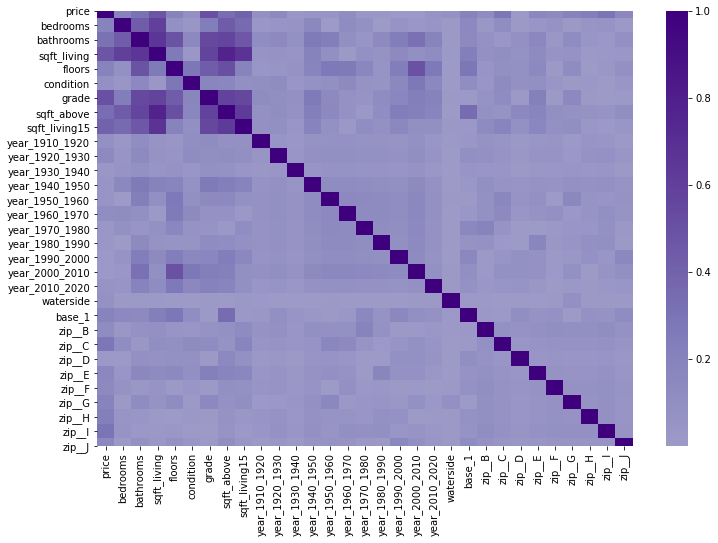

In [138]:
fig = plt.figure(figsize=(12,8))

sns.heatmap(abs(df.corr()), center=0, cmap='Purples')
plt.show()

Luckily, our data only shows 1 pair of highly correlated features, `sqft_living` and `sqft_above`. In order to prevent our model from having collinear features, one of the two features must be dropped. Between the two, `sqft_above` had a smaller $R^2$ when we generated single regression models for each continuous feature. Therefore, `sqft_lot` will be dropped as it has a less significant relationship to `price`.

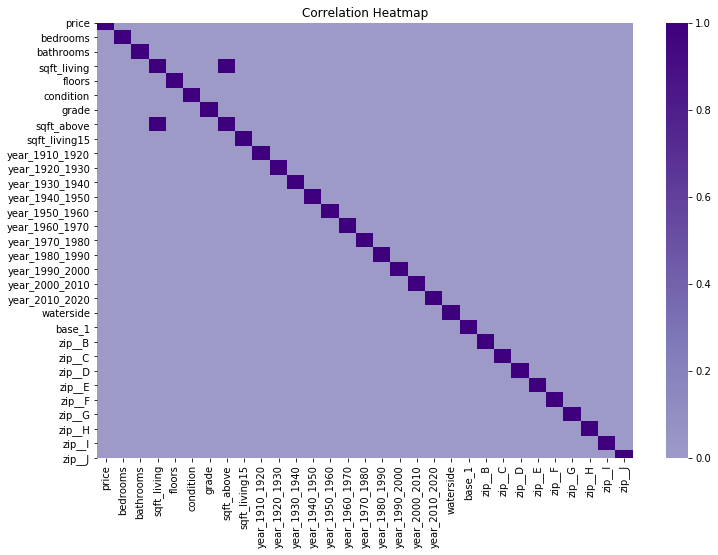

In [139]:
fig = plt.figure(figsize=(12,8))

sns.heatmap(abs(df.corr() > 0.70), center=0, cmap= 'Purples')
plt.title('Correlation Heatmap')
plt.show()

In [140]:
df.drop('sqft_above',axis=1,inplace=True)

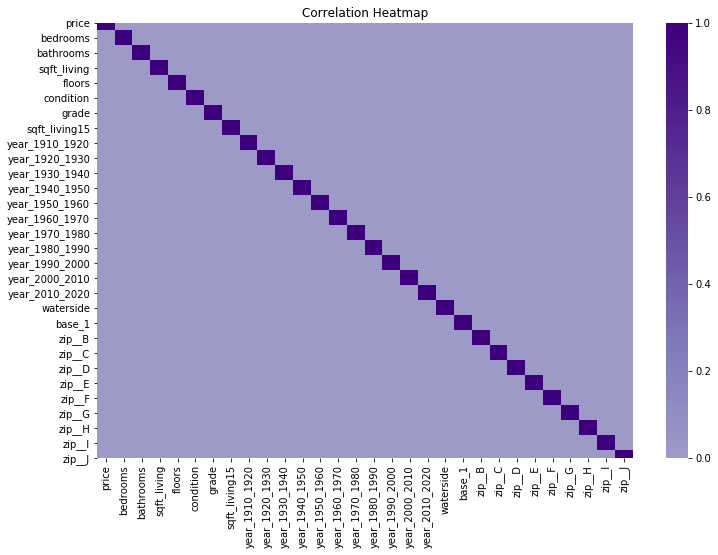

In [141]:
fig = plt.figure(figsize=(12,8))

sns.heatmap(abs(df.corr() > 0.7), center=0, cmap= 'Purples')
plt.title('Correlation Heatmap')
plt.show()

## Generating Models using Scikit-Learn

### Checking $R^2$ with Varying Number of Features to Select Best Features

In [142]:
# our column headers need to be formatted to fit into scikit's functions
df.columns = list(map(lambda x: 
                      x.replace('(', '').replace(']','').replace('_1.0','').replace(', ','_'),
                      df.columns))

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


X = df.drop(columns='price', axis=1)
y = df['price']

for n in range(1,31):
    
    linreg = LinearRegression()
    selector = RFE(linreg, n_features_to_select=n)
    selector = selector.fit(X,y)
    feat_cols = list(selector.support_ * np.array(X.columns))
    best_feat = list(filter(None, feat_cols))

    pred_sum = '+'.join(best_feat)
    f = 'price' + '~' + pred_sum
    model = ols(formula=f, data=df).fit()
    print(f'Model with {n} features \n', model.summary(), '\n\n')
    

Model with 1 features 
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     81.59
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           1.88e-19
Time:                        17:41:49   Log-Likelihood:            -1.9259e+05
No. Observations:               14273   AIC:                         3.852e+05
Df Residuals:                   14271   BIC:                         3.852e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.378e+05   1468

Model with 7 features 
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     1112.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:41:50   Log-Likelihood:            -1.8952e+05
No. Observations:               14273   AIC:                         3.791e+05
Df Residuals:                   14265   BIC:                         3.791e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.925e+05   1511

Model with 11 features 
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     1639.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:41:50   Log-Likelihood:            -1.8680e+05
No. Observations:               14273   AIC:                         3.736e+05
Df Residuals:                   14261   BIC:                         3.737e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.8

Model with 15 features 
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1384.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:41:51   Log-Likelihood:            -1.8622e+05
No. Observations:               14273   AIC:                         3.725e+05
Df Residuals:                   14257   BIC:                         3.726e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.3

Model with 19 features 
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     1309.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:41:51   Log-Likelihood:            -1.8543e+05
No. Observations:               14273   AIC:                         3.709e+05
Df Residuals:                   14253   BIC:                         3.710e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.7

Model with 23 features 
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     1132.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:41:52   Log-Likelihood:            -1.8521e+05
No. Observations:               14273   AIC:                         3.705e+05
Df Residuals:                   14249   BIC:                         3.707e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.6

Model with 26 features 
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     1021.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:41:52   Log-Likelihood:            -1.8512e+05
No. Observations:               14273   AIC:                         3.703e+05
Df Residuals:                   14246   BIC:                         3.705e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.9

Model with 30 features 
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     1112.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:41:53   Log-Likelihood:            -1.8419e+05
No. Observations:               14273   AIC:                         3.684e+05
Df Residuals:                   14243   BIC:                         3.687e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.4

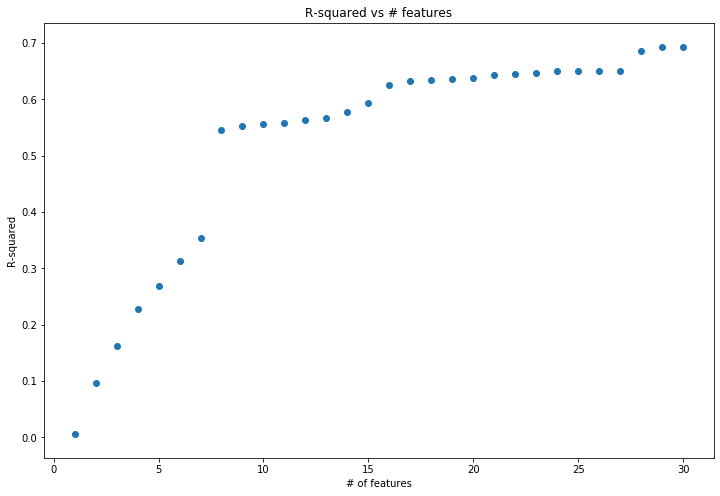

In [144]:
X = df.drop(columns='price', axis=1)
y = df['price']

feats = []
r_sq = []
for n in range(1,31):
    
    linreg = LinearRegression()
    selector = RFE(linreg, n_features_to_select=n)
    selector = selector.fit(X,y)
    feat_cols = list(selector.support_ * np.array(X.columns))
    best_feat = list(filter(None, feat_cols))

    pred_sum = '+'.join(best_feat)
    f = 'price' + '~' + pred_sum
    model = ols(formula=f, data=df).fit()
    
    
    feats.append(n)
    r_sq.append(model.rsquared)
    
fig = plt.figure(figsize=(12,8))
plt.scatter(feats, r_sq)
plt.title('R-squared vs # features')
plt.xlabel('# of features')
plt.ylabel('R-squared')
plt.show()


After the 8th feature, $R^2$ begins to increase at a much slower rate. This result shows that the ideal number of features in my model should be 8.

In [145]:
selector = RFE(linreg, n_features_to_select=8)
selector = selector.fit(X,y)
feat_cols = list(selector.support_ * np.array(X.columns))
best_feat = list(filter(None, feat_cols))

pred_sum = '+'.join(best_feat)
f = 'price' + '~' + pred_sum
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     2138.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:41:57   Log-Likelihood:            -1.8701e+05
No. Observations:               14273   AIC:                         3.740e+05
Df Residuals:                   14264   BIC:                         3.741e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.315e+05   9410.885    -24.601      0.000    -2.5e+05   -2.13e+05
grade       9.825e+04   1265.460     77.640      0.000    9.58e+04    1.01e+05
waterside   3.247e+05   2.43e+04     13.344      0.000    2.77e+05    3.72e+05
zip__C      1.088e+05   4346.291     25.023      0.000       1e+05    1.17e+05
zip__F     -1.403e+05   3882.150    -36.131      0.000   -1.48e+05   -1.33e+05
zip__G     -1.464e+05   4089.715    -35.793      0.000   -1.54e+05   -1.38e+05
zip__H      -2.07e+05   4178.058    -49.539      0.000   -2.15e+05   -1.99e+05
zip__I     -2.254e+05   3604.151    -62.539      0.000   -2.32e+05   -2.18e+05
zip__J     -1.772e+05   5184.646    -34.183      0.000   -1.87e+05   -1.67e+05
==============================================================================
Omnibus:                     1303.092   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2047.269
Skew:                           0.688   Prob(JB):                         0.00
Kurtosis:                       4.245   Cond. No.                         183.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Discussing Initial Regression Model

Our initial regression model generated by Scikit has an $R^2$ of 0.545, meaning 54.5% of the variations in our target variable `price` are explained by the independent variables `grade`, `water`, and zipcode groups C, F, G, H, I, and J.

We could attempt to improve this result by returning to our dataset and doing some additional cleaning, normalizing, and transforming of the data. This could potentially generate a different set of features that could possibly raise our $R^2$. However, we will instead continue with evaluating our current model by generating a testing and training set using Scikit-Learn's `train_test_split()` function for our dataset. After running prediction functions in Scikit, we will be able to compare the mean squared error of the train and test set to determine how accurate the model is at predicting housing prices.

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[best_feat], y, test_size = 0.3, random_state=1)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [147]:
from sklearn.metrics import mean_squared_error as mse

train_mse = mse(y_train, y_hat_train)
test_mse = mse(y_test, y_hat_test)

print('Train Mean Squared Error: ', train_mse)
print('Test Mean Squared Error: ', test_mse)
print('Difference: ', round(abs(train_mse-test_mse),2))

Train Mean Squared Error:  13982298664.217426
Test Mean Squared Error:  14249840315.20642
Difference:  267541650.99


In [148]:
train_err, test_err = np.sqrt(train_mse), np.sqrt(test_mse)
print('Train Root Mean Squared Error: ', round(train_err,2))
print('Test Root Mean Squared Error: ', round(test_err,2))

Train Root Mean Squared Error:  118246.77
Test Root Mean Squared Error:  119372.7


In [149]:
print('Difference in Error: ', round(abs(train_err - test_err),0))

Difference in Error:  1126.0


The problem with doing a `train_test_split()` on a dataset to determine its (R)MSE is the way the dataset is split into its training and testing sets. Depending on how this split is done, the results can vary. By indicating an integer value for the `random_state` parameter in `train_test_split()`, I was able to generate the same results each time I split the training and test sets. However, without indicating a `random_state`, the results would not be consistent. 

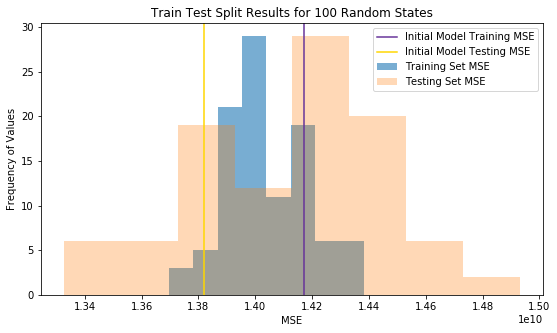

In [150]:
err_train = []
err_test = []

for loop in np.arange(1,101):
    X_train, X_test, y_train, y_test = train_test_split(X[best_feat], y, test_size = 0.3)

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test
    
    train_mse = mse(y_train, y_hat_train)
    test_mse = mse(y_test, y_hat_test)
    
    err_train.append(train_mse)
    err_test.append(test_mse)
    

plt.figure(figsize=(9,5))
plt.hist(err_train, bins='auto', alpha=0.6, label='Training Set MSE')
plt.hist(err_test, bins='auto', alpha=0.3, label='Testing Set MSE')
plt.axvline(x=train_mse, label = 'Initial Model Training MSE', c = purple)
plt.axvline(x=test_mse, label = 'Initial Model Testing MSE', c = 'gold')
plt.xlabel('MSE')
plt.ylabel('Frequency of Values')
plt.title('Train Test Split Results for 100 Random States')
plt.legend()
plt.show()

After running the same randomized split function 100 times, the graph above shows how the resulting MSE's from our model can fluctuate depending on how the data was split. The train and test MSE's that we found from our split and `random_state = 1` are within the range of results. However, this train/test split method of determining a model's goodness of fit and mean squared error is not consistent and too dependent on how the dataset is sampled. 

The solution for this inconsistency is to use Scikit-Learn's `cross_val_score` function to cross-validate the results. The K-Fold cross validation method splits the dataset into K groups and selects one of those groups to be a test set while the other K-1 groups are used to train the algorithm. This process is repeated until all groups have been selected as the test set. Once the model is passed through each iteration of the test/train split data, the function will return the MSE of the model as a negative value, if `scoring` is set to `'neg_mean_squared_error'`.

In [151]:
from sklearn.model_selection import cross_val_score

cv_10_results = np.mean(cross_val_score(linreg, X[best_feat], y, cv=10, scoring='neg_mean_squared_error'))
cv_10_results

-14157066244.960443

In [152]:
cv_10_rmse = round(np.sqrt(abs(cv_10_results)),2)
cv_10_rsq = round(np.mean(cross_val_score(linreg, X[best_feat], y, cv=10, scoring='r2')),2)
print('First Model RMSE: ', cv_10_rmse)
print('First Model R-squared: ', cv_10_rsq)

First Model RMSE:  118983.47
First Model R-squared:  0.54


## Second Linear Regression Model

Our first model resulted in an $R^2$ of 0.545. In order to improve this result, a second model can be made using transformed values from the dataset. 

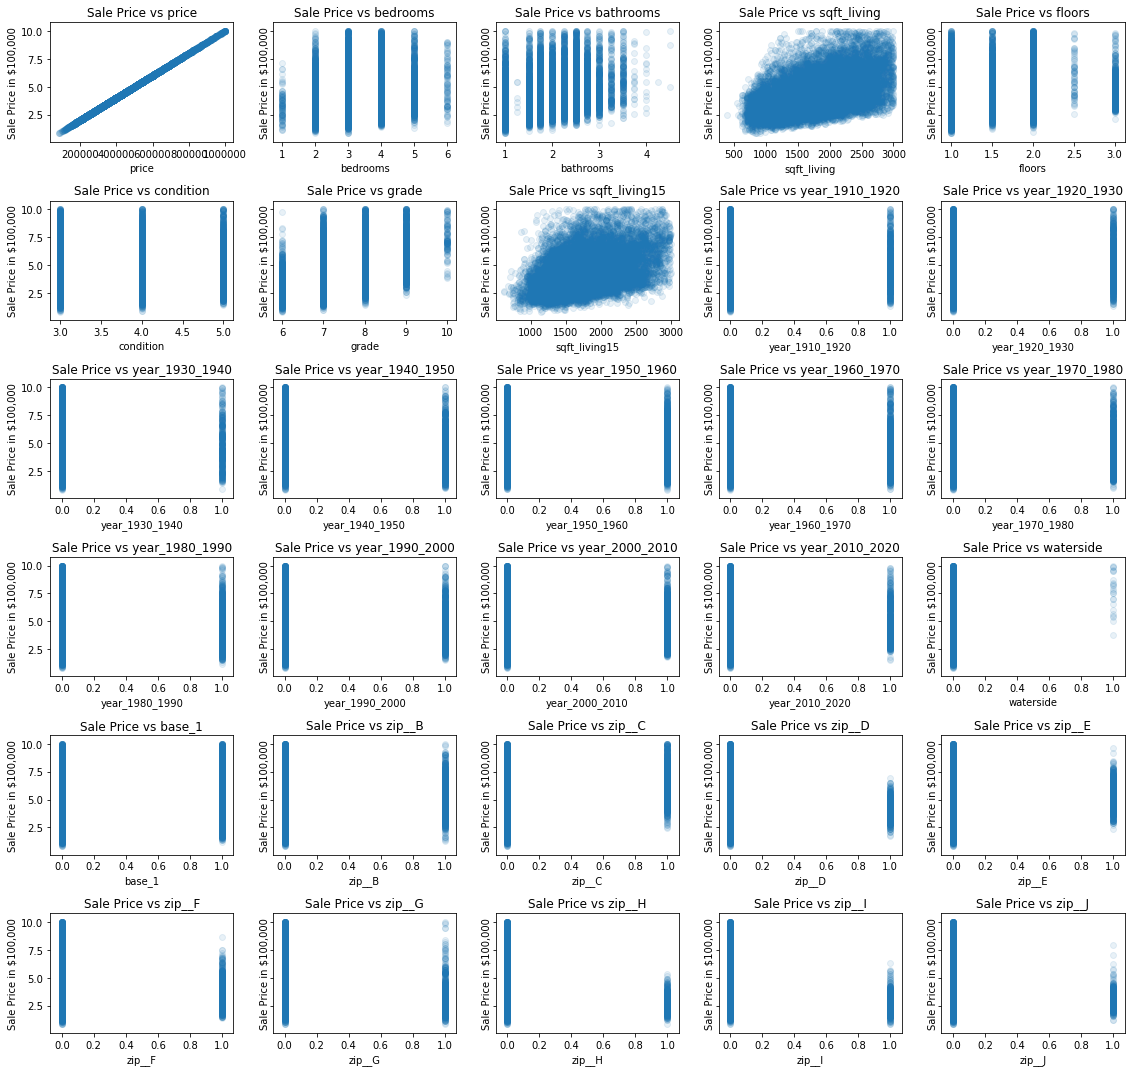

In [153]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=0.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')
    
fig.tight_layout()

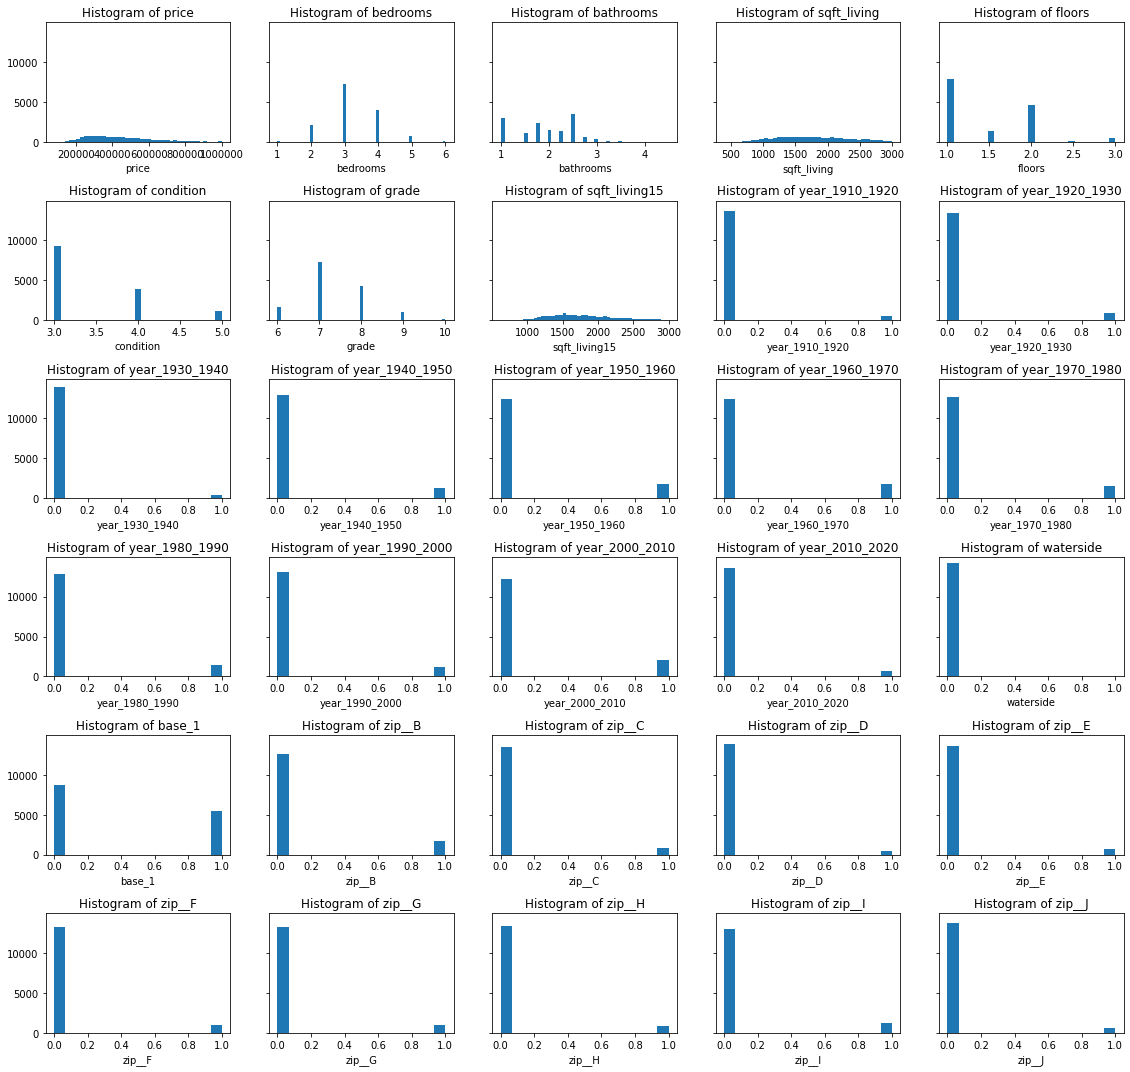

In [154]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.hist(df[column],bins='auto', label=column)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    
fig.tight_layout()

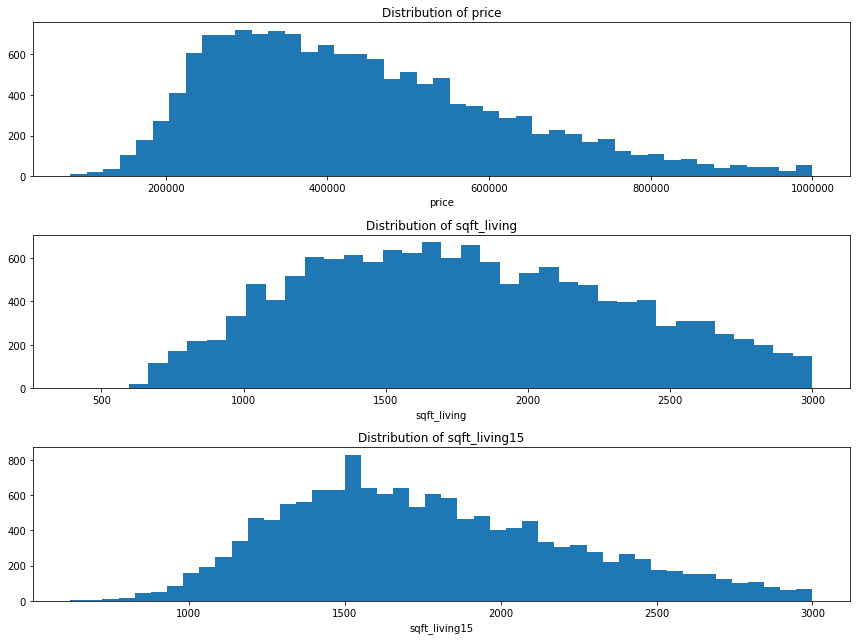

In [155]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,9))

for ax, column in zip(axes.flatten(), ['price','sqft_living','sqft_living15']):
    ax.hist(df[column], bins='auto', label=column)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    
fig.tight_layout()

The histogram of `price` shows us that the distribution of values is not a normal curve. By log transforming the `price` column, we can see below that the target variable is now a little more normalized.

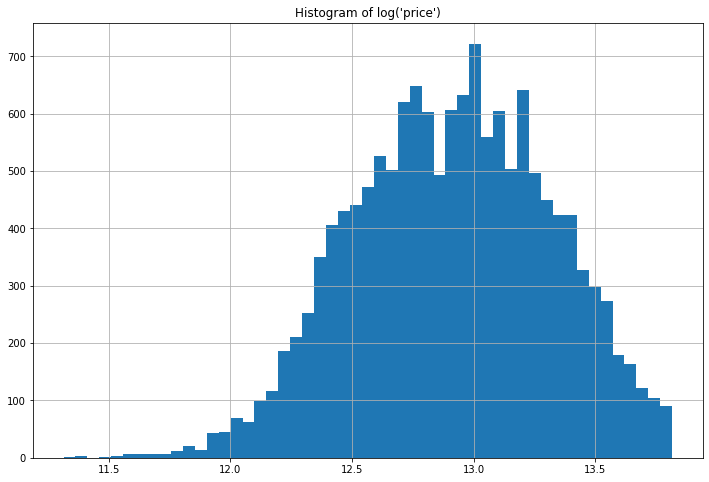

In [156]:
np.log(df['price']).hist(bins='auto', figsize=(12,8))
plt.title("Histogram of log('price')");

In [157]:
logdf = df.copy()
logdf['price'] = np.log(logdf['price'])

In [158]:
logdf.rename(columns = {'price':'logprice'}, inplace=True)

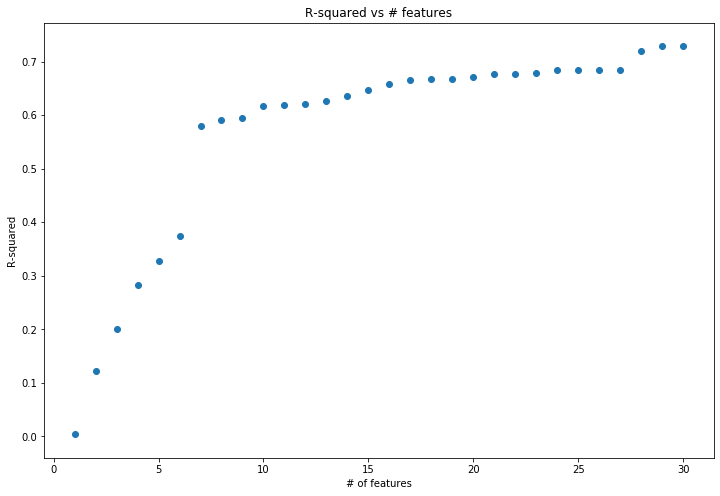

In [159]:
X = logdf.drop(columns='logprice', axis=1)
y = logdf['logprice']

feats = []
r_sq = []
for n in range(1,31):
    
    linreg = LinearRegression()
    selector = RFE(linreg, n_features_to_select=n)
    selector = selector.fit(X,y)
    feat_cols = list(selector.support_ * np.array(X.columns))
    best_feat = list(filter(None, feat_cols))

    pred_sum = '+'.join(best_feat)
    f = 'logprice' + '~' + pred_sum
    model = ols(formula=f, data=logdf).fit()
    
    feats.append(n)
    r_sq.append(model.rsquared)
    
fig = plt.figure(figsize=(12,8))
plt.scatter(feats, r_sq)
plt.title('R-squared vs # features')
plt.xlabel('# of features')
plt.ylabel('R-squared')
plt.show()
    

With the target variable now being `logprice`, we can see that the best number of features to select for this model is 7.

In [160]:
selector = RFE(linreg, n_features_to_select=7)
selector = selector.fit(X,y)
feat_cols = list(selector.support_ * np.array(X.columns))
best_feat = list(filter(None, feat_cols))

pred_sum = '+'.join(best_feat)
f = 'logprice' + '~' + pred_sum
model = ols(formula=f, data=logdf).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     2808.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:42:17   Log-Likelihood:                -1188.9
No. Observations:               14273   AIC:                             2394.
Df Residuals:                   14265   BIC:                             2454.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.3518      0.021    545.240      0.000      11.311      11.393
grade          0.2331      0.003     83.560      0.000       0.228       0.239
waterside      0.6264      0.054     11.609      0.000       0.521       0.732
zip__F        -0.3386      0.009    -39.509      0.000      -0.355      -0.322
zip__G        -0.4125      0.009    -45.604      0.000      -0.430      -0.395
zip__H        -0.5403      0.009    -58.530      0.000      -0.558      -0.522
zip__I        -0.6082      0.008    -76.480      0.000      -0.624      -0.593
zip__J        -0.4463      0.011    -38.910      0.000      -0.469      -0.424
==============================================================================
Omnibus:                      268.734   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.041
Skew:                          -0.186   Prob(JB):                     1.13e-93
Kurtosis:                       3.762   Cond. No.                         183.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
logcv_10_results = np.mean(cross_val_score(linreg, X[best_feat], y, cv=10, scoring='neg_mean_squared_error'))
logcv_10_rmse = round(np.sqrt(abs(logcv_10_results)),2)
logcv_10_rsq = round(np.mean(cross_val_score(linreg, X[best_feat], y, cv=10, scoring='r2')),2)
print('Second Model RMSE: ', logcv_10_rmse)
print('Second Model R-squared: ', logcv_10_rsq)

Second Model RMSE:  0.26
Second Model R-squared:  0.57


Since our second model used a log transformed value for `price`, it is no longer in the same scale as our first model. This means we __cannot__ compare the RMSE of the two models in order to determine which of the two can more accurately predict the housing prices. However, the $R^2$ can still be compared since it does not depend on the scale but rather the overall "goodness of fit" of the test/training sets.

The second model produced a slightly higher $R^2$ of 0.579, compared to our first model's 0.545. The second model would be the more accurate one to use to predict the prices of houses sold in King County. The variables that contribute to the model have coefficients that are also in a log scale. In order to determine their 1-unit contribution to the change in price, all of the coefficient values need to be inverse-log transformed, or $e^x$, subtract 1, then multiply by 100 to find the __percent__ change in the price of the house.

In [162]:
import math

logparams = pd.DataFrame(model.params, columns=['coef'])
logparams['% change'] = logparams['coef'].map(lambda x: round((math.exp(x) -1) * 100))
logparams.drop(labels='Intercept',inplace=True)
logparams

,coef,% change
grade,0.233077,26
waterside,0.626420,87
zip__F,-0.338585,-29
zip__G,-0.412482,-34
zip__H,-0.540317,-42
zip__I,-0.608151,-46
zip__J,-0.446343,-36


In [ ]:
"""
# Includes Seattle, Shoreline, Lake Forest Park
zipA = [98177, 98160, 98155, 98133, 98125, 98115, 98103, 98117, 
        98107, 98199, 98119, 98102, 98109, 98112, 98185, 98105, 
        98195, 98145, 98181, 98181, 98154, 98164, 98121, 98101,
        98104, 98122, 98134, 98124, 98144, 98116, 98136, 98126, 
        98106, 98108, 98118, 98178]

# Includes Kenmore, Bothell, Woodinville, Redmond, Kirkland
zipB = [98028, 98041, 98011, 98072, 98014, 98052, 98053, 98034, 98033, 98083, 98077]

# Includes Bellevue, Mercer Island, Medina
zipC = [98039, 98004, 98009, 98015, 98005, 98007, 98008, 98006, 98040]

# Includes Duvall, Carnation, Snoqualmie, Northbend
zipD = [98019, 98014, 98065, 98045, 98024]

# Includes Sammamish, Issaquah
zipE = [98074, 98075, 98029, 98027]

# Includes Newcastle, Renton
zipF = [98059, 98056, 98057, 98055, 98058]

# Includes Burien, Normandy Park, SeaTac, Tukwila, Vashon Island, Des Moines
zipG = [98146, 98168, 98062, 98166, 98158, 98148, 98188, 98168,
        98138, 98070, 98198]

# Includes Kent, Covington
zipH = [98032, 98031, 98035, 98064, 98030, 98042]

# Includes Federal Way, Algona, Auburn, Pacific, Milton
zipI = [98023, 98063, 98003, 98047, 98071, 98001, 98093, 98002, 98092]

# Includes Maple Valley, Black Diamond, Enumclaw
zipJ = [98038, 98010, 98025, 98022]
"""

## Final Model Interpretation

Now, we can see that a 1-unit increase in `grade` would cause a 26% increase in the price of the house. The largest contributing variable in our model is `water`, or whether or not the property has a view of a waterfront. Since `water` is a binary variable, simply having a house that sits on waterfront property increases the price of the house by 87%.

Our model also shows negative values for coefficients resulting in negative changes in `price`. A 1-unit increase in the binary variable `zip_F`, for example, would cause a 29% __decrease__ in the price of the house. Since all of the zipcode variables are binary, this means that by living in any of the zipcodes that are included in groups F, G, H, I, and J would cause the value of your house to drop.

In [163]:
print('Average cost of a house in King County (with no other variables) is $', round(math.exp(model.params[0]),2))

Average cost of a house in King County (with no other variables) is $ 85118.9


The intercept of our model, 11.3518, represents the mean for `logprice` when all other independent variables are equal to zero. By solving the log transformation, we find that the average price of a house, given that all other variables are 0, would be $85,118.90.

# Extra Data

Making a plot of King County total assessed valuations from 1996-2015.

https://www.kingcounty.gov/depts/assessor/Reports/statistical-reports/~/media/depts/assessor/documents/AnnualReports/2015/TaxStats/15DistAV.ashx.

In [167]:
data = {'year':[1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015],
        'total_value':[123,127,135,150,166,188,211,225,236,249,271,299,341,387,342,330,319,315,341,388]}

data1 = pd.DataFrame(data=data)
data1.columns = ['Year','Total Value in Billions (USD)']
data1

,Year,Total Value in Billions (USD)
0,1996,123
1,1997,127
2,1998,135
3,1999,150
4,2000,166
5,2001,188
6,2002,211
7,2003,225
8,2004,236
9,2005,249


In [178]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [186]:
data1['text'] = 'placeholder'
data1.columns = ['year','value','text']
data1

,year,value,text
0,1996,123,placeholder
1,1997,127,placeholder
2,1998,135,placeholder
3,1999,150,placeholder
4,2000,166,placeholder
5,2001,188,placeholder
6,2002,211,placeholder
7,2003,225,placeholder
8,2004,236,placeholder
9,2005,249,placeholder


In [236]:
for n in range(len(data1)):
    data1['text'][n] = f'${data1["value"][n]}b'

In [247]:
data1.iplot(
            mode='lines+markers+text',
            x='year',
            y='value',
            text='text',
            opacity = 0.8,
            layout=dict(
                        xaxis=dict(tickvals= data1['year'],
                                   tickmode='array',
                                   title='Year'),
                        yaxis=dict(title='Total Value in Billions (USD)'),
                        title='King County Total Assessed Value <br>1996 - 2015'))